# Νευρωνικά δίκτυα και ευφυή υπολογιστικά ζητήματα
## Επιβλεπόμενη Μάθηση

### Γεωργία Μανιφάβα
### Δημήτρης Βάσιος
### Ηλίας Ραγκούσης

# Imports and read csv

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import sklearn

import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import optuna
import time

# Import classes for preprocessing-->for optimization
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing #StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from pathlib import Path

pd.options.display.max_rows = 9

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
csv = pd.read_csv('/kaggle/input/speedate/Speed Date.csv', encoding = "ISO-8859-1")
print(csv)
csv.head()

/kaggle/input/speedate/Speed Date.csv
/kaggle/input/speed-dating/Speed Dating Data.csv
      iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     ...      5.0      7.0       7.0

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


* Το csv μας έχει 8378 δείγματα και 195 στήλες. Κατεβάσαμε το speed dating data csv, μετατρέψαμε 3 στήλες που περιείχαν αριθμούς σε numerical δεδομένα, προκειμένου να μπορούμε να τα διαζειριστούμε παρακάτω, και δημιουργήσαμε ένα καινούριο dataset στο kaggle, το οποίο μπορείτε να βρείτε στα συννημένα αρχεία με όνομα Speed Dating New Dataset και πρέπει να το προσθέσετε από το +Αdd Data. Για την κατανόηση του dataset και της σημασίας όλων των στηλών, συμβουλευτήκαμε αυτή τη σελίδα: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/ και συγκεκριμένα το doc με όνομα Speed Dating Data Key, που έχουμε επίσης επισυνάψει στην υποβολή. Τα δεδομένα έχουν προκύψει από 4 surveys που πραγματοποιήθηκαν από καθηγητή του Columbia Business School. Λίγο πιο συγκεκριμένα, κάθε δείγμα του csv, αναφέρετε σε ένα speed dating μεταξύ 2 ανθρώπων που έχουν επιλεχθεί από διαφορετικά groups-waves, που σχηματίστηκαν πιο πριν. Οι υπόλοιπες στήλες περιέχουν βαθμολογίες, προτιμήσεις και στοιχεία που αφορούν τους συμμετέχοντες, σχετικά με το πόση σημασία δίνουν για παράδειγμα στην εμφάνιση ή στην ευφυία του partner τους και τέλος υπάρχει η στήλη match που θα αποτελέσει και τον προς πρόβλεψη πίνακα από τους ταξινομητές μας. Η match έχει στοιχεία 1 και 0, αν δηλαδή το ζευγάρι θα ήθελε να ξαναβγεί ραντεβού ή όχι αντίστοιχα. Το πρώτο survey έγινε για να εγγραφούν οι ενδιαφερόμενοι, το δεύτερο πραγματοποιήθηκε ακριβώς μετά το date, το τρίτο μία μέρα μετά το event και το τέταρτο μετά την 3-4 εβδομάδα που ενημερώθηκαν οι συμμετέχοντες για τα matches.*

In [2]:
# Αφού διαβάζουμε το csv, θα ελέγχξουμε πόσα κενά υπάρχουν και θα τα τοποθετήσουμε σε αύξουσα σειρά
(csv.isnull().sum()).sort_values(ascending = True)

iid            0
dec_o          0
samerace       0
match          0
            ... 
sinc7_2     6423
expnum      6578
numdat_3    6882
num_in_3    7710
Length: 195, dtype: int64

In [3]:
# Βρίσκουμε το ποσοστο κενών που έχει η κάθε στήλη και τα εμφανίζουμε σεφθίνουσα σειρά
(csv.isnull().sum() / len(csv)).sort_values(ascending = False)

num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
sinc7_2     0.766651
              ...   
condtn      0.000000
idg         0.000000
gender      0.000000
dec         0.000000
Length: 195, dtype: float64

In [4]:
# Κάνουμε μία επισκόπηση στο ποιες στήλες υπάρχουν στο αρχείο
csv.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

*Κάνουμε μία μικρή επισκόπηση στα περιεχόμενα των στηλών με κατηγορικά χαρακτηριστικά.*

In [5]:
count = csv['match'].value_counts()
print('match')
print(count)
count = csv['field'].value_counts()
print('\nfield')
print(count)
count = csv['zipcode'].value_counts()
print('\nzipcode')
print(count)
count = csv['income'].value_counts()
print('\nincome')
print(count)

match
0    6998
1    1380
Name: match, dtype: int64

field
Business             521
MBA                  468
Law                  462
Social Work          378
                    ... 
Stats                  6
MFA  Poetry            6
marine geophysics      5
theory                 5
Name: field, Length: 259, dtype: int64

zipcode
0.0         355
10021.0     139
10027.0     128
10025.0     121
           ... 
519000.0      5
12590.0       5
11020.0       5
10803.0       5
Name: zipcode, Length: 409, dtype: int64

income
55080.0    124
53229.0     41
25401.0     39
78704.0     37
          ... 
63351.0      5
78193.0      5
48929.0      5
40375.0      5
Name: income, Length: 261, dtype: int64


In [6]:
#Ελέγχουμε τους τύπους των δεδομένων
grp = csv.columns.to_series().groupby(csv.dtypes).groups
{k.name:v for k, v in grp.items()}

{'int64': Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
        'partner', 'match', 'samerace', 'dec_o', 'dec'],
       dtype='object'),
 'float64': Index(['id', 'positin1', 'pid', 'int_corr', 'age_o', 'race_o', 'pf_o_att',
        'pf_o_sin', 'pf_o_int', 'pf_o_fun',
        ...
        'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
        'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
       dtype='object', length=178),
 'object': Index(['field', 'undergra', 'from', 'career'], dtype='object')}

*Μετά την παραπάνω σύντομη επισκόπηση, παρατηρούμε ότι τα χαρακτηριστικά-στήλες έχουν επικεφαλίδες και η αρίθμηση των γραμμών γίνεται από τη βιβλιοθήκη pandas. Επίσης, υπάρχουν μη διατεταγμένα και κατηγορικά χαρακτηριστικά στο dataset, αριθμητικά και μη. Κάποια από αυτά είναι τα εξής: 'positin1','met_o','from', 'goal','date','go_out','met','length','numdat_2'* Τα labels των κλάσεων βρίσκονται στη στήλη match, στην 12η στήλη.

# Data cleaning

*Για το data cleaning και τη διαχείριση των δεδομένων θα χρησιμοποιηθεί η βιβλιοθήκη pandas που μας παρέχει την κλάση Dataframe.* 



*Mία πρώτη παρατήρηση είναι ότι υπάρχουν 2 στήλες, οι dec και dec_o, οι οποίες για κάθε σειρά-δείγμα μας δίνουν την απόφαση του κάθε συμμετέχοντα και του partner του για το αν θα επαναλάμβαναν το ραντεβού. Εφόσον όμως πρέπει να προβλέψουμε την στήλη match, θα πρέπει να διαγράψουμε τις 2 παραπάνω στήλες, αφού δεν πρέπει να έχουμε γνώση του αποτελέσματος για την πρόβλεψη*

In [7]:
data = csv.drop(columns=['dec', 'dec_o'])
data.shape

(8378, 193)

### Missing values

*Θα διαχειριστούμε τις απουσιάζουσες τιμές πριν μετατρέψουμε τα κατηγορικά χαρακτηριστικά*

*Για τις στήλες'race', 'race_o', 'field_cd' και 'career_c'που περιέχουν κατηγορικά χαρακτηστικά, θα συμπληρώσουμε τα κενά τους με την κωδικοποίηση που ισοδυναμεί με την επιλογή other και μας δώθηκε στο Speed Dating Data key.*

In [8]:
#Replacing nan in race to value 6 which is other
data['race'] = data['race'].fillna(6)
data['race_o'] = data['race_o'].fillna(6)
#same for field, 18 is other
data['field_cd'] = data['field_cd'].fillna(18)
#same for career, 15 is other
data['career_c'] = data['career_c'].fillna(15)

*Θα αγνοήσουμε τις στήλες που περιέχουν κενά σε ποσοστό μεγαλύτερο από 40%. Σε αυτή την απόφαση οδηγηθήκαμε αφού οι στήλες με τα περισσότερα κελιά παρατηρούμε ότι βρίσκονται στο τέταρτο survey, μέχρι το οποίο τα περισσότερα match ήταν 0 και άρα πολλά άτομα δε συμμετείχαν.*

In [9]:
min_count =  int(0.6*data.shape[0] + 1)
data = data.dropna( axis=1, thresh=min_count)

In [10]:
# Τα ονόματα των στηλών που έχουν παραμείνει.
data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr',
       'sinc',

### SimpleImputer-Συνεχείς μεταβλητές

*Θα συμπλώσουμε τις Missing values με SimpleImputer με median για τις συνεχείς μεταβλητές και με most frequent strategy για τις κατηγορικές μεταβητές.*

In [11]:
cont_features_imputed = data.loc[:, ['int_corr','age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
       'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','prob_o','age','imprace','imprelig','sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr',
       'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','match_es','satis_2','attr1_2', 'sinc1_2',
       'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2',
       'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2',
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2',
       'intel3_2', 'fun3_2', 'amb3_2']]
imp = SimpleImputer(missing_values = np.NaN, strategy='median')
dataset_imputed = pd.DataFrame(imp.fit_transform(cont_features_imputed))
dataset_imputed.columns = cont_features_imputed.columns
dataset_imputed.index = cont_features_imputed.index
data.loc[:,['int_corr','age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
       'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','prob_o','age','imprace','imprelig','sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr',
       'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','match_es','satis_2','attr1_2', 'sinc1_2',
       'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2',
       'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2',
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2',
       'intel3_2', 'fun3_2', 'amb3_2']] = dataset_imputed.loc[:, :]


### SimpleImputer-Categorical

In [12]:
cat_features_imputed = data.loc[:, ['positin1','met_o','from', 'goal','date','go_out','met','length','numdat_2']]
imp = SimpleImputer(missing_values = np.NaN, strategy='most_frequent')
dataset_imputed = pd.DataFrame(imp.fit_transform(cat_features_imputed))
dataset_imputed.columns = cat_features_imputed.columns
dataset_imputed.index = cat_features_imputed.index
data.loc[:,['positin1','met_o','from','goal','date','go_out','met','length','numdat_2']] = dataset_imputed.loc[:, :]

*Παρατηρούμε ότι υπάρχουν κενά στις στήλες id και pid, που είναι αντίστοιχα ο ξεχωριστός αριθμός του συμμετέχοντα εντός ενός wave και ο μοναδικός κωδικός που αντιστοιχεί σε έναν partner. Επίσης, με απλή παρατήρηση του csv, αντιλαμβανόμαστε ότι τα κενά αυτών των δύο στηλών είναι ελάχιστα και υπάρχει συγκεκριμένο pattern. Έτσι, βρίσκουμε τους κωδικούς που πρέπει να γεμίσουν τα κενά.*

In [13]:
#missing id
data['id'] = data['id'].fillna(22)

#### There is 10 missing pid (partner’s iid number) in the dataset. Since there is no iid missing, we could probably impute quite easily.

In [14]:
#missing pids
data['pid'] = data['pid'].fillna(128)

In [15]:
# Έχουμε κι άλλα NaN, σε ποιες στήλες και πόσα σε κάθε μία;
null_vals = {}
for column in data.columns.values:
    null_vals[column] = data[column].isnull().sum()
null_vals

{'iid': 0,
 'id': 0,
 'gender': 0,
 'idg': 0,
 'condtn': 0,
 'wave': 0,
 'round': 0,
 'position': 0,
 'positin1': 0,
 'order': 0,
 'partner': 0,
 'pid': 0,
 'match': 0,
 'int_corr': 0,
 'samerace': 0,
 'age_o': 0,
 'race_o': 0,
 'pf_o_att': 0,
 'pf_o_sin': 0,
 'pf_o_int': 0,
 'pf_o_fun': 0,
 'pf_o_amb': 0,
 'pf_o_sha': 0,
 'attr_o': 0,
 'sinc_o': 0,
 'intel_o': 0,
 'fun_o': 0,
 'amb_o': 0,
 'shar_o': 0,
 'like_o': 0,
 'prob_o': 0,
 'met_o': 0,
 'age': 0,
 'field': 63,
 'field_cd': 0,
 'race': 0,
 'imprace': 0,
 'imprelig': 0,
 'from': 0,
 'zipcode': 1064,
 'goal': 0,
 'date': 0,
 'go_out': 0,
 'career': 89,
 'career_c': 0,
 'sports': 0,
 'tvsports': 0,
 'exercise': 0,
 'dining': 0,
 'museums': 0,
 'art': 0,
 'hiking': 0,
 'gaming': 0,
 'clubbing': 0,
 'reading': 0,
 'tv': 0,
 'theater': 0,
 'movies': 0,
 'concerts': 0,
 'music': 0,
 'shopping': 0,
 'yoga': 0,
 'exphappy': 0,
 'attr1_1': 0,
 'sinc1_1': 0,
 'intel1_1': 0,
 'fun1_1': 0,
 'amb1_1': 0,
 'shar1_1': 0,
 'attr4_1': 0,
 'sinc4_

*Υπάρχουν ακόμα κενά στις στήλες field(field of study), career και zipcode(για την περιοχή που μένει ο καθένας). Οι field και career θα αντικαταστηθούν από τις field_cd, career_c που αποτελούν κωδικοποιήσεις τους και δεν έχουν κενά, ενώ η zipcode μπορεί να αντικατασταθεί από μία κωδικοποίηση της from.*

### Convert categorical values - Encoding

*Thus, we can build a dictionary mapping the string entries to their corresponding integer codes and then use this dictionary to replace missing code values.*

In [16]:
def replace_code(data, name_col, code_col):
    code_dict = dict(zip(data[name_col], data[code_col]))
    data[code_col].update(data[name_col].map(code_dict))
    return code_dict

field_dict = replace_code(data, 'field', 'field_cd')
career_dict = replace_code(data, 'career', 'career_c')
print(set(data.field_cd))
print(set(data.career_c))

# Μπορούμε πλέον να διαγράψουμε τις στήλες field και career.
data = data.drop(columns=['field', 'career'])

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0}
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0}


In [17]:
null_vals = {}
for column in data.columns.values:
    null_vals[column] = data[column].isnull().sum()
null_vals

{'iid': 0,
 'id': 0,
 'gender': 0,
 'idg': 0,
 'condtn': 0,
 'wave': 0,
 'round': 0,
 'position': 0,
 'positin1': 0,
 'order': 0,
 'partner': 0,
 'pid': 0,
 'match': 0,
 'int_corr': 0,
 'samerace': 0,
 'age_o': 0,
 'race_o': 0,
 'pf_o_att': 0,
 'pf_o_sin': 0,
 'pf_o_int': 0,
 'pf_o_fun': 0,
 'pf_o_amb': 0,
 'pf_o_sha': 0,
 'attr_o': 0,
 'sinc_o': 0,
 'intel_o': 0,
 'fun_o': 0,
 'amb_o': 0,
 'shar_o': 0,
 'like_o': 0,
 'prob_o': 0,
 'met_o': 0,
 'age': 0,
 'field_cd': 0,
 'race': 0,
 'imprace': 0,
 'imprelig': 0,
 'from': 0,
 'zipcode': 1064,
 'goal': 0,
 'date': 0,
 'go_out': 0,
 'career_c': 0,
 'sports': 0,
 'tvsports': 0,
 'exercise': 0,
 'dining': 0,
 'museums': 0,
 'art': 0,
 'hiking': 0,
 'gaming': 0,
 'clubbing': 0,
 'reading': 0,
 'tv': 0,
 'theater': 0,
 'movies': 0,
 'concerts': 0,
 'music': 0,
 'shopping': 0,
 'yoga': 0,
 'exphappy': 0,
 'attr1_1': 0,
 'sinc1_1': 0,
 'intel1_1': 0,
 'fun1_1': 0,
 'amb1_1': 0,
 'shar1_1': 0,
 'attr4_1': 0,
 'sinc4_1': 0,
 'intel4_1': 0,
 'fun4

*Mένει να διαχειριστούμε μόνο το zipcode.*

#### Zipcode basically functions like an encoding for the from attribute, therefore we will replace it with a simple unique index encoding for from and then we will delete zipcode column:



In [18]:
# βρίσκουμε τις μοναδικές ετικέτες
from_mapping = {label:idx for idx,label in enumerate(np.unique(data['from']))}
from_mapping
# και κάνουμε την μετατροπή
data['from'] = data['from'].map(from_mapping)  
data
data = data.drop(columns='zipcode')
data.loc[:, 'from']

0       49
1       49
2       49
3       49
        ..
8374    70
8375    70
8376    70
8377    70
Name: from, Length: 8378, dtype: int64

In [19]:
data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'goal',
       'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise',
       'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',
       'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1',
       'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb',
       'shar'

In [20]:
# Οι παρακάτω είναι οι στήλες που χρειάζονται κανονικοποίηση και περιέχουν βαθμολογίες σε χαρακτηριστικά όπως το attraction, intelligence και fun.
# Συγκεκριμένα, στα groups 6 έως 9 ζητήθηκε να βαθμολογήσουν από 1-10, ενώ στους υπόλοιπους ζητήθηκε να μοιράσουν 100 πόντους μεταξύ των χαρακτηριστικών.
# Επομένως, χρειάζεται να γίνει πολλαπλασιασμός επί 10των βαθμολογιών  των groups 6-9 και να γίνει κανονικοποίηση ώστε να προκύπτει άθροισμα 100.
data.iloc[:,60:78]
data.iloc[:,96:114]

,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2
0,19.44,16.67,13.89,22.22,11.11,16.67,25.0,10.0,10.0,15.0,10.0,10.0,25.0,15.0,15.0,18.52,10.0,13.95
1,19.44,16.67,13.89,22.22,11.11,16.67,25.0,10.0,10.0,15.0,10.0,10.0,25.0,15.0,15.0,18.52,10.0,13.95
2,19.44,16.67,13.89,22.22,11.11,16.67,25.0,10.0,10.0,15.0,10.0,10.0,25.0,15.0,15.0,18.52,10.0,13.95
3,19.44,16.67,13.89,22.22,11.11,16.67,25.0,10.0,10.0,15.0,10.0,10.0,25.0,15.0,15.0,18.52,10.0,13.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,70.00,0.00,15.00,10.00,0.00,5.00,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.00,5.0,10.00
8375,70.00,0.00,15.00,10.00,0.00,5.00,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.00,5.0,10.00
8376,70.00,0.00,15.00,10.00,0.00,5.00,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.00,5.0,10.00
8377,70.00,0.00,15.00,10.00,0.00,5.00,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.00,5.0,10.00


### Change in scaling and Normalizing attributes

#### Normalizing the values for the attributes, converting wave 6-9 to the same method used on the other waves (sum of 100 intead of 1-10 for each item). 

In [21]:
def convertattributes(dataframe):
    #for XXX_1
    mask = (dataframe['wave'] >=6) & (dataframe['wave'] <=9)
    for i in dataframe[mask].index:
        if dataframe.iloc[i,60:78].sum()==0:
            dataframe.iloc[i,60:78]=0
        else:
            total=dataframe.iloc[i,60:78].sum()
            dataframe.iloc[i,60:78]*=(100/total)
 #for XXX_2
        if dataframe.iloc[i,96:114].sum()==0:
            dataframe.iloc[i,96:114]=0
        else:
            total2=dataframe.iloc[i,96:114].sum()
            dataframe.iloc[i,96:114]*=(100/total2)

In [22]:
convertattributes(data)

In [23]:
print(csv.isna().sum().sum())
print(data.isna().sum().sum())
(data.isnull().sum()).sort_values(ascending = True)
# έχουμε καθαρίσει πλέον όλα τα κενά και μετατρέψει όλα τα κατηγορικά χαρακτηριστικά

432016
0


iid         0
fun         0
intel       0
sinc        0
           ..
age         0
met_o       0
tvsports    0
amb3_2      0
Length: 119, dtype: int64

*Οι ετικέτες με τις κλάσεις προς πρόβλεψη είναι στη 12η στήλη.*

In [24]:
labels = data.iloc[:, [12]]
labels

,match
0,0
1,0
2,1
3,1
...,...
8374,0
8375,0
8376,0
8377,0


In [25]:
#convert to numpy array to be usable in sklearn estimators
labels = labels.values.flatten()
print(labels.shape)
labels

(8378,)


array([0, 0, 1, ..., 0, 0, 0])

*Οι υπόλοιπες στήλες περιέχουν τα features, που μετά το data cleaning είναι 118.*

In [26]:
features = data.iloc[:, :]
features = features.drop(columns=['match'])
#covert to numpy array
features = features.values

print(features.shape)
features

(8378, 118)


array([[1, 1.0, 0, ..., 8.0, 7.0, 6.0],
       [1, 1.0, 0, ..., 8.0, 7.0, 6.0],
       [1, 1.0, 0, ..., 8.0, 7.0, 6.0],
       ...,
       [552, 22.0, 1, ..., 7.0, 6.0, 9.0],
       [552, 22.0, 1, ..., 7.0, 6.0, 9.0],
       [552, 22.0, 1, ..., 7.0, 6.0, 9.0]], dtype=object)

#### Η κλάση match=0 έχει 6998 δείγματα, ενώ η κλάση match=1 έχει 1380 δείγματα. Επομένως, το dataset δεν είναι ισορροπημένο. 

In [27]:
sum1=0
sum0=0
for i in range(labels.shape[0]):
    if labels[i]==1:
        sum1 += 1
    else:
        sum0 += 1
        
ratio = max(sum1, sum0)/min(sum1, sum0)
if ratio < 1.5:
    print('Balanced Dataset')
else:
    print('Not balanced dataset')
    
print("the ratio of the 2 classes is {} with sum1= {} and sum0={}".format(ratio, sum1, sum0))

Not balanced dataset
the ratio of the 2 classes is 5.071014492753624 with sum1= 1380 and sum0=6998


*Correlation of each attribute to the final answer in match column. Just to have an overview about the correlation of the attributes.*

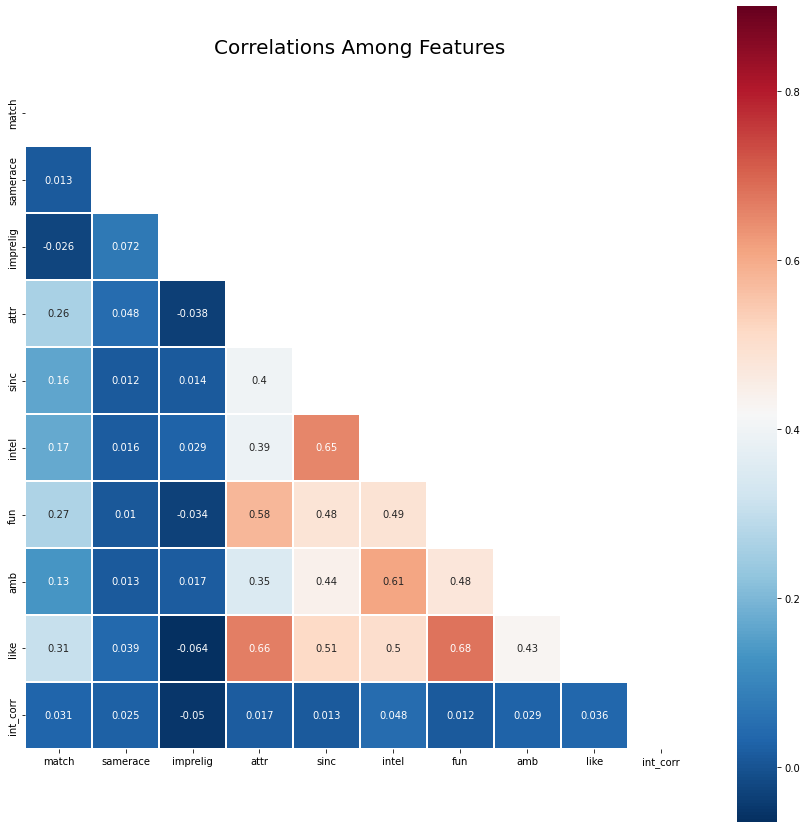

In [28]:
corr = data.corr()['match']
corr.sort_values(ascending=False)

corr_columns = [
'match',
'samerace',
'imprelig',
'attr',
'sinc',
'intel',
'fun',
'amb',
'like',
'met',
'int_corr'
]

data_corr = data[corr_columns]

mask = np.zeros_like(data_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,15))
sns.heatmap (data_corr.corr(), 
             annot=True,
             mask = mask,
             cmap = 'RdBu_r',
             linewidths=0.1, 
             linecolor='white',
             vmax = .9,
             square=True)

plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

#### Εφαρμόζουμε StandardScaler στα δεδομένα μας, δηλαδή αφαιρούμε από το κάθε attribute τον μέσο όρο του και κάνουμε scaling ως προς τη μοναδιαία διακύμανση, ώστε να πετύχουμε καλύτερες προβλέψεις.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)
print(x_train.shape, x_test.shape)

X_train = preprocessing.StandardScaler().fit_transform(x_train)
X_test = preprocessing.StandardScaler().fit_transform(x_test)

(6702, 118) (1676, 118)


#### Για κάθε ταξινομητή, θα εξετάσουμε δύο μετρικές, το accuracy και την F1-score. Για τον υπολογισμό των μετρικών θα χρησιμοποιηθεί 10fold cross validation στο **train set**. Tο split του data set επιλέχθηκε 80/20, έτσι ώστε να έχουμε μεγάλο αριθμό δειγμάτων στο training set και να μπορούμε να εφαρμόσουμε αποτελεσματικά cross validation. Η μετρική accuracy χρησιμοποιείται συνήθως για dataset με ίσο αριθμό δειγμάτων για κάθε κατηγορία, ενώ το f1-score όταν τα δείγματα δεν είναι ισοκατανεμημένα στις κλάσεις. Συγκεκριμένα, θα εξετάσουμε την f1_weighted που είναι πιο χαρακτηριστική για imbalance datasets. Θα εξετάσουμε όλες τις παραπάνω μετρικές για να επαληθεύσουμε όσα αναφέραμε θεωρητικά και να διαπιστώσουμε ποια μετρική είναι πιο χαρακτηριστική. 


In [ ]:
def score_cross_val(estimator, X, y):
    acc = stats.mean(cross_val_score(estimator, X, y, cv=10))
    f1 = stats.mean(cross_val_score(estimator, X, y, cv=10
                                    , scoring = 'f1_weighted'))
    print("The mean cross validated accuracy of "+str(estimator)+" is:{}".format(acc)+"\n")
    print("The mean cross validated F1-score of "+str(estimator)+" is:{}".format(f1)+"\n")

#### Υπολογίζουμε τις επιδόσεις των εκτιμητών Dummy,  SVM και MLP.

In [ ]:
estimators = [DummyClassifier(), SVC(), MLPClassifier()]
for model in estimators:
    score_cross_val(model, X_train, y_train)

### Calculate and compare performance in test set

In [ ]:
def DummyClassification(x_train, y_train, x_test, y_test):
    
    accuracies, predictions = {}, {} #define dictionaries
    
    dc_uniform = DummyClassifier(strategy="uniform")
    dc_const_1 = DummyClassifier(strategy="constant", constant = 1)
    dc_const_0 = DummyClassifier(strategy="constant", constant = 0)
    dc_stratified = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")
    
    dc_uniform.fit(x_train, y_train)
    dc_const_1.fit(x_train, y_train)
    dc_const_0.fit(x_train, y_train)
    dc_stratified.fit(x_train, y_train)
    dc_frequent.fit(x_train, y_train)
    
    #use predictions for f1 score calculation
    predictions['uniform'] = dc_uniform.predict(x_test)
    predictions['constant_1'] = dc_const_1.predict(x_test)
    predictions['constant_0'] = dc_const_0.predict(x_test)
    predictions['stratified'] = dc_stratified.predict(x_test)
    predictions['frequent'] = dc_frequent.predict(x_test)
    
    accuracies['uniform'] = dc_uniform.score(x_test, y_test)
    accuracies['constant_1'] = dc_const_1.score(x_test, y_test)
    accuracies['constant_0'] = dc_const_0.score(x_test, y_test)
    accuracies['stratified'] = dc_stratified.score(x_test, y_test)
    accuracies['frequent'] = dc_frequent.score(x_test, y_test)
    
    return accuracies, predictions

### Out of the box

In [ ]:
#Dummy

accuracies, predictions = DummyClassification(X_train, y_train, X_test, y_test)
f1_micro, f1_weighted = {}, {}

for strategy in predictions:
    f1_micro[strategy] = f1_score(y_test, predictions[strategy], average = "micro")
    f1_weighted[strategy] = f1_score(y_test, predictions[strategy], average = "weighted")  #f1_weighted takes into account the imbalance of the dataset
    
for strategy in predictions:
    print("The accuracy of the " + str(strategy) + " Dummy Classifier is {} ".format(accuracies[strategy])+"\n")
    print("The f1_micro of the " + str(strategy) + " Dummy Classifier is {} ".format(f1_micro[strategy])+"\n")
    print("The f1_weighted of the " + str(strategy) + " Dummy Classifier is {} ".format(f1_weighted[strategy])+"\n\n\n")
    
print(classification_report(y_test, predictions['frequent']))
print (confusion_matrix(predictions['frequent'], y_test))

In [ ]:
#MLP

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
accuracies['mlp'] = mlp.score(X_test, y_test)
predictions['mlp'] = mlp.predict(X_test)

f1_micro['mlp'] = f1_score(y_test, predictions['mlp'], average = "micro")
f1_weighted['mlp'] = f1_score(y_test, predictions['mlp'], average = "weighted") 

print("The accuracy of the MLP Classifier is {} ".format(accuracies['mlp'])+"\n")
print("The f1_micro of the MLP Classifier is {} ".format(f1_micro['mlp'])+"\n")
print("The f1_weighted of the MLP Classifier is {} ".format(f1_weighted['mlp'])+"\n")
print(classification_report(y_test, predictions['mlp']))
print (confusion_matrix(predictions['mlp'], y_test))
plot_confusion_matrix(mlp, X_test, y_test)
plt.title("MLP")
plt.show()

In [ ]:
#SVC

svm = SVC()
svm.fit(X_train, y_train)
accuracies['svm'] = svm.score(X_test, y_test)
predictions['svm'] = svm.predict(X_test)

f1_micro['svm'] = f1_score(y_test, predictions['svm'], average = "micro")
f1_weighted['svm'] = f1_score(y_test, predictions['svm'], average = "weighted") 

print("The accuracy of the SVM Classifier is {} ".format(accuracies['svm'])+"\n")
print("The f1_micro of the SVM Classifier is {} ".format(f1_micro['svm'])+"\n")
print("The f1_weighted of the SVM Classifier is {} ".format(f1_weighted['svm'])+"\n")
print(classification_report(y_test, predictions['svm']))
print (confusion_matrix(predictions['svm'], y_test))
plot_confusion_matrix(svm, X_test, y_test)
plt.title("SVM")
plt.show()

### Markdown πίνακας 

|Classifier|Accuracy|F1_micro|F1_weighted|
|:---:|:---:|:---:|:---:|
|Dummy(constant=0)|0.8347|0.8347|0.7595|
|SVM|0.864|0.864|0.8372|
|MLP|0.86|0.86|0.8468|



### Barplot

In [ ]:
df = pd.DataFrame({
'models': ['Dummy', 'Dummy', 'Dummy', 'SVM', 'SVM', 'SVM', 'MLP', 'MLP', 'MLP'],
'scores': [accuracies['constant_0'], f1_micro['constant_0'], f1_weighted['constant_0'], accuracies['svm'], f1_micro['svm'], f1_weighted['svm'],accuracies['mlp'], f1_micro['mlp'], f1_weighted['mlp']],
'Metrics': ['Accuracy', 'F1_micro', 'F1_weighted','Accuracy', 'F1_micro', 'F1_weighted','Accuracy', 'F1_micro', 'F1_weighted']})

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(15, 8))

# grouped barplot
sns.barplot(x="models", y="scores", hue="Metrics", data=df, ci=None);

plt.title('Performance comparison on 3 metrics', fontsize=16)

#### Ως Dummy Classifier θα χρησιμοποιηθεί προφανώς ο constant_0, o oποίος έχει τις καλύτερες επιδόσεις από τους Dummy, αφού το dataset είναι αρκετά μη ισορροπημένο με περισσότερα δείγματα στην κλάση 0. Παρατηρούμε ότι ο Dummy έχει συγκρίσιμες επιδόσεις με τους άλλους δύο, κάτι που μας εκπλήσσει αρκετά, αλλά πιθανώς οφείλεται στο ότι έχουμε πολύ imbalanced dataset. Ωστόσο, χρησιμοποιούμε ως baseline τον dummy, προκειμένου να βελτιώσουμε και τις επιδόσεις των άλλων 2 εκτιμητών. Επίσης, παρατηρούμε ότι το f1-weighted score είναι πιο χαρακτηριστική μετρική μεταξύ του dummy και των άλλων δύο μοντέλων.
#### Η f1-weighted των SVM και MLP είναι παραπλήσιες.

## Optimization

#### Kαλούμαστε να μεγιστοποιήσουμε την επίδοση των 2 ταξινομητών με επιλογή των βέλτιστων υπερπαραμέτρων. Παρακάτω κάνουμε 4 διαφορετικές διαδικασίες βελτιστοποίσης που θεωρητικά θα πρέπει να μας οδηγήσουν στον βέλτιστο ταξινομητή. Επίσης, θα εκμεταλλευτούμε τις δυνατότητες που παρέχει η βιβλιοθήκη Optuna.
* Προεπεξεργασία
* Pipelines
* Κάναμε Grid Search, με ορισμό πεδίων τιμών για τις υπερπαραμέτρους
* Στη διαδικασία βελτιστοποίησης με την βιβλιοθήκη Optuna θα εργαστούμε ως εξής:
1. Βρίσκουμε τις βέλτιστες υπερπαραμέτρους των μετασχηματιστών που αφορούν το preprocessing. Θα χρησιμοποιήσουμε τους VarianceThresholder, StandardScaler, RandomOverSampler και PCA. Συγκεκριμένα, θα βελτιστοποιήσουμε το κατώφλι διασποράς του VarianceThreshold και τον αριθμό συνιστωσών του PCA, για τη μείωση διαστατικότητας.
2. Έπειτα, προσδιορίζουμε τις βέλτιστες υπερπαραμέτρους του εκάστοτε εκτιμητή. Οι υπερπαράμετροι ορίζονται παρακάτω.
3. Συνδυάζουμε τα δύο παραπάνω σε ένα Pipeline, εκπεδεύουμε το μοντέλο με 2-φολδ cross validation στο training set και τέλος με χρήση Optuna, προσδιορίζουμε τον βέλτιστο συνδυασμό υπερπαραμέτρων

#### Preprocessing

In [30]:
def preprocessing_opt(classifier, x_train, x_test, y_train, y_test):
    selector = VarianceThreshold()
    train_red = selector.fit_transform(x_train)
    test_red = selector.transform(x_test)
    
    scaler = preprocessing.StandardScaler()
    train_scaled = scaler.fit_transform(train_red)
    test_scaled = scaler.transform(test_red)
    
    ovsample = RandomOverSampler()
    train_resampled, trainTargets_resampled = ovsample.fit_resample(train_scaled, y_train)
    
    n=80
    pca = PCA(n_components=n)
    train_PCA = pca.fit_transform(train_resampled)
    test_PCA = pca.transform(test_scaled)
    
    classifier.fit(train_PCA, trainTargets_resampled)
    preds = classifier.predict(test_PCA)
    print(classification_report(y_test, preds))
    acc = cross_val_score(classifier, train_PCA, trainTargets_resampled, cv=10)
    f1_weighted = cross_val_score(classifier, train_PCA, trainTargets_resampled, cv=10, scoring='f1_weighted')
    print("The cross validated accuracy for " + str(classifier) + "  is {} ".format(stats.mean(acc))+"\n")
    print("The cross validated f1_weighted for " + str(classifier) + "  is {} ".format(stats.mean(f1_weighted))+"\n")

In [31]:
mlp = MLPClassifier()
svm = SVC()

preprocessing_opt(mlp, x_train, x_test, y_train, y_test)
preprocessing_opt(svm, x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1396
           1       0.55      0.55      0.55       280

    accuracy                           0.85      1676
   macro avg       0.73      0.73      0.73      1676
weighted avg       0.85      0.85      0.85      1676

The cross validated accuracy for MLPClassifier()  is 0.9500180801580221 

The cross validated f1_weighted for MLPClassifier()  is 0.9494483574489306 

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1396
           1       0.47      0.69      0.56       280

    accuracy                           0.82      1676
   macro avg       0.70      0.77      0.72      1676
weighted avg       0.86      0.82      0.83      1676

The cross validated accuracy for SVC()  is 0.9002144927997962 

The cross validated f1_weighted for SVC()  is 0.8998174757114225 



#### Pipelines

In [ ]:
def create_pipeline(classifier, x_train, y_train):
    selector = VarianceThreshold()
    scaler = preprocessing.StandardScaler()
    ros = RandomOverSampler()
    pca = PCA(n_components=80)
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('classifier', classifier)])
    
    acc = cross_val_score(classifier, x_train, y_train, cv=10)
    f1_weighted = cross_val_score(classifier, x_train, y_train, cv=10, scoring='f1_weighted')
    print("The cross validated accuracy for " + str(classifier) + "  is {} ".format(stats.mean(acc))+"\n")
    print("The cross validated f1_weighted for " + str(classifier) + "  is {} ".format(stats.mean(f1_weighted))+"\n")
    
    return selector, scaler, ros, pca, pipe

In [ ]:
mlp = MLPClassifier()
svm = SVC()

mlp_selector, mlp_scaler, mlp_ros, mlp_pca, _ = create_pipeline(mlp, x_train, y_train)
svm_selector, svm_scaler, svm_ros, svm_pca,_ = create_pipeline(svm, x_train, y_train)

#### Hyperparameters Optimization with Grid search, cross validation and optimization library **Optuna**

### 1)MLP

*Έπειτα, προσδιορίζουμε βέλτιστες παραμέτρους του MLP με χρήση της Optuna. Ειδικότερα, οι υπερπαράμετροι που πρόκειται να προσδιοριστούν είναι οι εξής:*

* n_layers: ο αριθμός των επιπέδων του Νευρωνικού Δικτύου
* n_units: o αριθμός των νευρώνων κάθε επιπέδου
* activation: η χρησιμοποιούμενη μη γραμμική συνάρτηση ενεργοποίησης. Αναζητάμε μεταξύ των ReLU, tanh και logistic.
* learning rate init: αρχικοποίηση του ρυθμού μάθησης
* optimizer: ο χρησιμοποιούμενος βελτιστοποιητής, ανάμεσα στους Adam και SGD.
* max_iter: ο μέγιστος αριθμός επαναλήψεων κατά την εκπαίδευση του Νευρωνικού.
* Eφαρμόζουμε τεχνικές Early Stopping, προκειμένου να αποφύγουμε φαινόμενα overfitting κατά την εκπαίδευση. Οι βέλτιστες τιμές υπερπαραμέτρων αναζητούνται με χρήση Optuna για 100 tasks.

In [ ]:
# Βρίσκω τα variance όλων των στηλών για να χρησιμοποιήσω τα αποτελέσματα στην βελτιστοποίηση της VarianceThreshold
train_variance = np.sort(x_train.var(axis=0))
print(train_variance)
#[0.05, 25095]

In [ ]:
def grids_params(x_train, y_train):
    #tranformers' hyperparameters
    vthreshold = [2000,5000]
    
    #hyperparameters for Mlp
    layers =[(100),(100,100),(150,150)]
    activation = ['relu','tanh']
    learning_rate = ['constant', 'adaptive']
    optimizer = ['sgd', 'adam']
    max_iter =[100, 200]
    
    #define classifier
    mlp = MLPClassifier(hidden_layer_sizes=layers, solver=optimizer, activation=activation,
                       max_iter=max_iter, learning_rate=learning_rate, early_stopping=True) #early_stopping: terminates the training when it tends to overfit
    #define the transformers
    selector = VarianceThreshold(threshold=vthreshold)
    scaler = preprocessing.StandardScaler()
    ros = RandomOverSampler()
    pca = PCA()
    
    #define the pipe
    pipe = Pipeline(steps=[('selector',selector),('scaler', scaler),('sampler', ros),('pca',pca),('classifier', mlp)], memory='tmp')
    
    estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, classifier__hidden_layer_sizes=layers,
                                   classifier__solver=optimizer, classifier__activation=activation, classifier__max_iter=max_iter, classifier__learning_rate=learning_rate),
                                   cv=5, scoring='f1_weighted', n_jobs=-1)
    estimator.fit(x_train, y_train)
    print('Best parameters found from GridSearch:', estimator.best_params_)
    print(estimator.best_estimator_)

In [ ]:
grids_params(x_train, y_train)

In [ ]:
pipe=Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=5000)),
                ('scaler', preprocessing.StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA()),
                ('classifier',
                 MLPClassifier(activation='relu',hidden_layer_sizes= (100,), early_stopping=True, learning_rate= 'constant', max_iter=400,
                               solver='sgd'))])

acc = cross_val_score(pipe, x_train, y_train, cv=5)
f1_weighted = cross_val_score(pipe, x_train, y_train, cv=5,scoring = 'f1_weighted')
print(stats.mean(acc))
print(stats.mean(f1_weighted))

In [ ]:
def objective(trial, x_train, y_train):
    #tranformers' hyperparameters
    vthreshold = trial.suggest_loguniform('vthres', 0.01, 3)
    #for pca
    n_components = trial.suggest_int('pca_n', 50, 115, 5)
    
    #hyperparameters for Mlp
    n_layers = trial.suggest_int('n_layers', 1, 2)
    layers =[]
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 100, 150))
        
    activation = trial.suggest_categorical('activation',['relu', 'tanh','logistic'])
    learning_rate = trial.suggest_loguniform('learning_rate_init', 0.001, 0.005)
    optimizer = trial.suggest_categorical('optimizer', ['sgd', 'adam'])
    max_iter = trial.suggest_int('max_iter', 200, 400, 100)
    
    #define classifier
    mlp = MLPClassifier(hidden_layer_sizes=tuple(layers), solver=optimizer, activation=activation,
                       max_iter=max_iter, learning_rate_init=learning_rate, early_stopping=True) #early_stopping: terminates the training when it tends to overfit
    #define the transformers
    selector = VarianceThreshold(threshold=vthreshold)
    scaler = preprocessing.StandardScaler()
    ros = RandomOverSampler()
    pca = PCA(n_components = n_components)
    
    #define the pipe
    pipe = Pipeline(steps=[('selector',selector),('scaler', scaler),('sampler', ros),('pca',pca),('classifier', mlp)], memory='tmp')
    
    #train with cross validation
    scores = cross_val_score(pipe, x_train, y_train, cv=2, scoring = 'f1_weighted')
    return np.nanmean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial,x_train, y_train), n_trials=100)

In [ ]:
def evaluate(estimator, X_train, X_test, y_train, y_test, metric='accuracy'):
    start_time = time.time()
    # fit on train dataset
    estimator.fit(X_train, y_train)
    train_time = time.time() - start_time

    # evauate on test dataset
    start_time = time.time()
    preds = estimator.predict(X_test)
    print(classification_report(y_test, preds))
    test_time = time.time() - start_time
    performance = f1_score(y_test, preds,output_dict='True', average =metric)

    return performance, train_time, test_time

### Δημιουργία Pipeline με ταξινομητή MLP με βέλτιστες υπερπαραμέτρους και αξιολόγηση πάνω στο test set

In [ ]:
vthreshold = 0.18600900653741356#study.best_params['vthres']
n_components = 100#study.best_params['pca_n']
n_layers=2#study.best_params['n_layers']
layers = [135,127]#[study.best_params['n_units_0'],study.best_params['n_units_1']]
activation = 'logistic'#study.best_params['activation']
learning_rate = 0.00171623396146227#study.best_params['learning_rate_init']
optimizer = 'adam'#study.best_params['optimizer']
max_iter = 200#study.best_params['max_iter']

#best classifier
classifier = MLPClassifier(hidden_layer_sizes=tuple(layers), solver=optimizer, activation=activation,
                       max_iter=max_iter, learning_rate_init=learning_rate, early_stopping=True)

#best transformers
selector=VarianceThreshold(threshold=vthreshold)
scaler=preprocessing.StandardScaler()
ros=RandomOverSampler()
pca=PCA(n_components=n_components)

#best pipe
pipe = Pipeline(steps=[('selector', selector), ('scaler',scaler),('sampler', ros),('pca',pca),('estimator', classifier)], memory='tmp')

metrics, train_time, test_time = evaluate(pipe, x_train, x_test, y_train, y_test,'weighted')
print('accuracy='+str(100*metrics)+'%')
print('train time=' +str(100*metrics)+'msec')
print('test time='+str(1000*train_time)+ 'msec\n')


#### Παρακάτω είναι τα αποτελέσματα που προέκυψαν. Τα παραθέτουμε σε markdown διότι δεν προλάβαμε να αποθηκέυσουμε το output πριν την υποβολή:

[I 2022-12-06 15:05:29,965] A new study created in memory with name: no-name-5f6601ea-afaf-4f85-a140-e605b24f6711
[I 2022-12-06 15:05:52,383] Trial 0 finished with value: 0.7764846314532975 and parameters: {'vthres': 0.28619985281741595, 'pca_n': 55, 'n_layers': 1, 'n_units_0': 140, 'activation': 'relu', 'learning_rate_init': 0.0028185418435571286, 'optimizer': 'sgd', 'max_iter': 400}. Best is trial 0 with value: 0.7764846314532975.
[I 2022-12-06 15:06:14,790] Trial 1 finished with value: 0.7393315428230378 and parameters: {'vthres': 0.7944248050208833, 'pca_n': 105, 'n_layers': 1, 'n_units_0': 141, 'activation': 'logistic', 'learning_rate_init': 0.0013038629348930196, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 0 with value: 0.7764846314532975.
[I 2022-12-06 15:06:52,520] Trial 2 finished with value: 0.852581319009251 and parameters: {'vthres': 0.18600900653741356, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 135, 'n_units_1': 127, 'activation': 'logistic', 'learning_rate_init': 0.001716233961462278, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:07:09,854] Trial 3 finished with value: 0.8378096090719188 and parameters: {'vthres': 0.8239600498968849, 'pca_n': 90, 'n_layers': 1, 'n_units_0': 136, 'activation': 'relu', 'learning_rate_init': 0.0019355180748016551, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:08:26,395] Trial 4 finished with value: 0.8194568785437183 and parameters: {'vthres': 0.03610851106887729, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 121, 'n_units_1': 120, 'activation': 'tanh', 'learning_rate_init': 0.0015906490625407423, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:08:47,816] Trial 5 finished with value: 0.803789913458669 and parameters: {'vthres': 0.024435252263739368, 'pca_n': 90, 'n_layers': 1, 'n_units_0': 103, 'activation': 'relu', 'learning_rate_init': 0.00190022969631195, 'optimizer': 'sgd', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:09:10,947] Trial 6 finished with value: 0.8410922112802148 and parameters: {'vthres': 0.21550984692885544, 'pca_n': 70, 'n_layers': 1, 'n_units_0': 124, 'activation': 'tanh', 'learning_rate_init': 0.0015107536423439104, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:09:33,654] Trial 7 finished with value: 0.8413906296627872 and parameters: {'vthres': 1.5379841252025261, 'pca_n': 65, 'n_layers': 2, 'n_units_0': 126, 'n_units_1': 145, 'activation': 'relu', 'learning_rate_init': 0.0040012568488715546, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:09:52,336] Trial 8 finished with value: 0.7649955237242614 and parameters: {'vthres': 0.41727170881319015, 'pca_n': 105, 'n_layers': 1, 'n_units_0': 123, 'activation': 'logistic', 'learning_rate_init': 0.002581497646045241, 'optimizer': 'sgd', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:10:14,740] Trial 9 finished with value: 0.8495971351835273 and parameters: {'vthres': 0.10208763580956266, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 141, 'n_units_1': 106, 'activation': 'tanh', 'learning_rate_init': 0.0033298301395404076, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:10:37,148] Trial 10 finished with value: 0.7651447329155476 and parameters: {'vthres': 0.07543263263754713, 'pca_n': 75, 'n_layers': 2, 'n_units_0': 150, 'n_units_1': 137, 'activation': 'logistic', 'learning_rate_init': 0.0010012774189033862, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:10:57,925] Trial 11 finished with value: 0.8457176962100865 and parameters: {'vthres': 0.09008643218424438, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 149, 'n_units_1': 101, 'activation': 'tanh', 'learning_rate_init': 0.004039168237829974, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:11:19,236] Trial 12 finished with value: 0.8424350940017905 and parameters: {'vthres': 0.086175131649279, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 133, 'n_units_1': 118, 'activation': 'tanh', 'learning_rate_init': 0.0028930537996276614, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:11:41,755] Trial 13 finished with value: 0.8510892270963891 and parameters: {'vthres': 0.016852125374675047, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 113, 'n_units_1': 101, 'activation': 'logistic', 'learning_rate_init': 0.003284155553176475, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:12:04,293] Trial 14 finished with value: 0.8463145329752313 and parameters: {'vthres': 0.01308596773712342, 'pca_n': 80, 'n_layers': 2, 'n_units_0': 111, 'n_units_1': 132, 'activation': 'logistic', 'learning_rate_init': 0.0049578733772483955, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:12:30,831] Trial 15 finished with value: 0.8495971351835272 and parameters: {'vthres': 0.0113897772753784, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 114, 'n_units_1': 114, 'activation': 'logistic', 'learning_rate_init': 0.0022713816002475134, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:12:53,866] Trial 16 finished with value: 0.8042375410325275 and parameters: {'vthres': 0.0373654018143194, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 106, 'n_units_1': 128, 'activation': 'logistic', 'learning_rate_init': 0.002129989753421035, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:13:20,635] Trial 17 finished with value: 0.8136377200835572 and parameters: {'vthres': 0.47232737146284126, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 116, 'n_units_1': 111, 'activation': 'logistic', 'learning_rate_init': 0.0011971244440513618, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:13:50,328] Trial 18 finished with value: 0.8422858848105044 and parameters: {'vthres': 2.6607134650076993, 'pca_n': 80, 'n_layers': 2, 'n_units_0': 129, 'n_units_1': 150, 'activation': 'logistic', 'learning_rate_init': 0.0034768716323113503, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:14:17,048] Trial 19 finished with value: 0.8451208594449418 and parameters: {'vthres': 0.14837407187936902, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 109, 'n_units_1': 124, 'activation': 'logistic', 'learning_rate_init': 0.002443519044751533, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:14:48,390] Trial 20 finished with value: 0.8470605789316622 and parameters: {'vthres': 0.044037538284136674, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 118, 'n_units_1': 137, 'activation': 'logistic', 'learning_rate_init': 0.001850229964745636, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:15:13,462] Trial 21 finished with value: 0.8490002984183826 and parameters: {'vthres': 0.1630685932334763, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 141, 'n_units_1': 102, 'activation': 'tanh', 'learning_rate_init': 0.003349804338376523, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:15:34,933] Trial 22 finished with value: 0.8425843031930766 and parameters: {'vthres': 0.01964605566530218, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 145, 'n_units_1': 108, 'activation': 'tanh', 'learning_rate_init': 0.003262996521866506, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:15:56,689] Trial 23 finished with value: 0.8457176962100865 and parameters: {'vthres': 0.07068190784118132, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 135, 'n_units_1': 107, 'activation': 'tanh', 'learning_rate_init': 0.0048869982072447535, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:16:20,050] Trial 24 finished with value: 0.8472097881229483 and parameters: {'vthres': 0.15798080827331315, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 130, 'n_units_1': 100, 'activation': 'logistic', 'learning_rate_init': 0.004118972691122856, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:16:40,580] Trial 25 finished with value: 0.8367651447329156 and parameters: {'vthres': 0.05110898116422978, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 100, 'n_units_1': 106, 'activation': 'tanh', 'learning_rate_init': 0.0028696161344399507, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:17:07,959] Trial 26 finished with value: 0.7535064159952253 and parameters: {'vthres': 0.01852615129948255, 'pca_n': 50, 'n_layers': 2, 'n_units_0': 138, 'n_units_1': 116, 'activation': 'logistic', 'learning_rate_init': 0.0016227393840851157, 'optimizer': 'sgd', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:17:34,303] Trial 27 finished with value: 0.845270068636228 and parameters: {'vthres': 0.11848665434630971, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 144, 'n_units_1': 124, 'activation': 'logistic', 'learning_rate_init': 0.003674180119821926, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:17:52,588] Trial 28 finished with value: 0.8439271859146523 and parameters: {'vthres': 0.3150085102664975, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 131, 'n_units_1': 132, 'activation': 'relu', 'learning_rate_init': 0.003027751221908878, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:18:28,244] Trial 29 finished with value: 0.7996120561026558 and parameters: {'vthres': 0.2758788456820691, 'pca_n': 75, 'n_layers': 1, 'n_units_0': 143, 'activation': 'tanh', 'learning_rate_init': 0.002603249620352891, 'optimizer': 'sgd', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:18:45,982] Trial 30 finished with value: 0.8464637421665174 and parameters: {'vthres': 0.742754329444798, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 138, 'n_units_1': 112, 'activation': 'relu', 'learning_rate_init': 0.0021439347018024904, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:19:13,892] Trial 31 finished with value: 0.8494479259922412 and parameters: {'vthres': 0.010221443437444406, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 115, 'n_units_1': 113, 'activation': 'logistic', 'learning_rate_init': 0.002280794996520584, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:19:38,121] Trial 32 finished with value: 0.8060280513279618 and parameters: {'vthres': 0.010070453055403642, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 112, 'n_units_1': 105, 'activation': 'logistic', 'learning_rate_init': 0.0014092859249936528, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:20:08,733] Trial 33 finished with value: 0.8475082065055208 and parameters: {'vthres': 0.02525341974730116, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 119, 'n_units_1': 104, 'activation': 'logistic', 'learning_rate_init': 0.001795385643244121, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:20:31,967] Trial 34 finished with value: 0.7109817964786631 and parameters: {'vthres': 0.014920780775536864, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 127, 'n_units_1': 110, 'activation': 'logistic', 'learning_rate_init': 0.002270364352530549, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:20:58,892] Trial 35 finished with value: 0.844374813488511 and parameters: {'vthres': 0.02820893835022166, 'pca_n': 90, 'n_layers': 1, 'n_units_0': 107, 'activation': 'logistic', 'learning_rate_init': 0.0017236768882423995, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:21:16,802] Trial 36 finished with value: 0.8418382572366458 and parameters: {'vthres': 0.06167969647654456, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 113, 'n_units_1': 116, 'activation': 'relu', 'learning_rate_init': 0.002031283522909648, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:21:36,034] Trial 37 finished with value: 0.7542524619516562 and parameters: {'vthres': 0.10905686122669274, 'pca_n': 110, 'n_layers': 1, 'n_units_0': 122, 'activation': 'logistic', 'learning_rate_init': 0.0012069102071309936, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:21:58,855] Trial 38 finished with value: 0.8481050432706655 and parameters: {'vthres': 0.23530819601742536, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 134, 'n_units_1': 120, 'activation': 'tanh', 'learning_rate_init': 0.002517757025228677, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:22:22,663] Trial 39 finished with value: 0.8425843031930766 and parameters: {'vthres': 0.032844857694849995, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 146, 'n_units_1': 121, 'activation': 'logistic', 'learning_rate_init': 0.004429610983131908, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:22:50,492] Trial 40 finished with value: 0.8109519546404058 and parameters: {'vthres': 1.1085562686846904, 'pca_n': 105, 'n_layers': 1, 'n_units_0': 120, 'activation': 'relu', 'learning_rate_init': 0.0031261798406081, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:23:15,990] Trial 41 finished with value: 0.8470605789316622 and parameters: {'vthres': 0.01099139233224885, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 113, 'n_units_1': 114, 'activation': 'logistic', 'learning_rate_init': 0.0024134079774440344, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:23:42,528] Trial 42 finished with value: 0.8448224410623695 and parameters: {'vthres': 0.01663620985147843, 'pca_n': 60, 'n_layers': 2, 'n_units_0': 117, 'n_units_1': 110, 'activation': 'logistic', 'learning_rate_init': 0.0027138934520613274, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:24:08,644] Trial 43 finished with value: 0.8440763951059385 and parameters: {'vthres': 0.013319235898066922, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 116, 'n_units_1': 128, 'activation': 'logistic', 'learning_rate_init': 0.0023023746806113223, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:24:36,686] Trial 44 finished with value: 0.8481050432706654 and parameters: {'vthres': 0.4099454025755632, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 109, 'n_units_1': 104, 'activation': 'logistic', 'learning_rate_init': 0.0019907470746737196, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:24:57,535] Trial 45 finished with value: 0.8375111906893464 and parameters: {'vthres': 0.02125900099213478, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 125, 'n_units_1': 113, 'activation': 'tanh', 'learning_rate_init': 0.0037928393851666083, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:25:19,117] Trial 46 finished with value: 0.8018501939719487 and parameters: {'vthres': 0.01191801431484233, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 104, 'n_units_1': 103, 'activation': 'logistic', 'learning_rate_init': 0.0015018218409735518, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:25:48,301] Trial 47 finished with value: 0.8457176962100865 and parameters: {'vthres': 0.014833921886050799, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 115, 'n_units_1': 121, 'activation': 'logistic', 'learning_rate_init': 0.0017114560366796236, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:26:13,994] Trial 48 finished with value: 0.8504923903312445 and parameters: {'vthres': 0.03514814495251694, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 138, 'n_units_1': 100, 'activation': 'logistic', 'learning_rate_init': 0.0027387409613413498, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:26:37,474] Trial 49 finished with value: 0.842882721575649 and parameters: {'vthres': 0.04759697309150881, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 138, 'n_units_1': 100, 'activation': 'tanh', 'learning_rate_init': 0.003004998487581857, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:27:01,279] Trial 50 finished with value: 0.844374813488511 and parameters: {'vthres': 0.031005814490319843, 'pca_n': 80, 'n_layers': 2, 'n_units_0': 132, 'n_units_1': 107, 'activation': 'logistic', 'learning_rate_init': 0.0034057719510320345, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:27:27,159] Trial 51 finished with value: 0.8412414204715011 and parameters: {'vthres': 0.02251052023547738, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 140, 'n_units_1': 100, 'activation': 'logistic', 'learning_rate_init': 0.0027171162520760583, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:27:56,546] Trial 52 finished with value: 0.8437779767233662 and parameters: {'vthres': 0.01775843260848908, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 148, 'n_units_1': 109, 'activation': 'logistic', 'learning_rate_init': 0.0021924489959350723, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:28:17,403] Trial 53 finished with value: 0.8134885108922709 and parameters: {'vthres': 0.19499106347639372, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 142, 'n_units_1': 128, 'activation': 'logistic', 'learning_rate_init': 0.0023630432489983, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:28:41,988] Trial 54 finished with value: 0.8448224410623695 and parameters: {'vthres': 0.10709734629903671, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 137, 'n_units_1': 102, 'activation': 'logistic', 'learning_rate_init': 0.003172650897234509, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:29:05,005] Trial 55 finished with value: 0.8503431811399582 and parameters: {'vthres': 0.042317757246972974, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 110, 'n_units_1': 118, 'activation': 'logistic', 'learning_rate_init': 0.0035659562237771716, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:29:25,343] Trial 56 finished with value: 0.837958818263205 and parameters: {'vthres': 0.036440821271698336, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 110, 'n_units_1': 118, 'activation': 'tanh', 'learning_rate_init': 0.0035988612387836696, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:29:49,218] Trial 57 finished with value: 0.8464637421665174 and parameters: {'vthres': 0.05746384569224332, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 140, 'n_units_1': 140, 'activation': 'logistic', 'learning_rate_init': 0.004296642091886524, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:30:24,844] Trial 58 finished with value: 0.8307967770814682 and parameters: {'vthres': 0.07269409847879954, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 104, 'n_units_1': 126, 'activation': 'relu', 'learning_rate_init': 0.002826008872644717, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:30:47,695] Trial 59 finished with value: 0.8436287675320799 and parameters: {'vthres': 0.043970540440667984, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 106, 'n_units_1': 133, 'activation': 'logistic', 'learning_rate_init': 0.0038631424148072974, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:31:11,545] Trial 60 finished with value: 0.8394509101760669 and parameters: {'vthres': 0.04104258157795497, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 101, 'n_units_1': 116, 'activation': 'tanh', 'learning_rate_init': 0.0010061642894362117, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:31:31,650] Trial 61 finished with value: 0.8215458072217249 and parameters: {'vthres': 0.1380568382915164, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 114, 'n_units_1': 114, 'activation': 'logistic', 'learning_rate_init': 0.0026499922111783004, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:31:57,991] Trial 62 finished with value: 0.8443748134885108 and parameters: {'vthres': 0.09003298902113063, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 128, 'n_units_1': 118, 'activation': 'logistic', 'learning_rate_init': 0.003552530755932453, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:32:23,297] Trial 63 finished with value: 0.8427335123843629 and parameters: {'vthres': 0.02496139403789792, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 107, 'n_units_1': 106, 'activation': 'logistic', 'learning_rate_init': 0.0029627041051028466, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:32:46,951] Trial 64 finished with value: 0.8431811399582214 and parameters: {'vthres': 0.011477926141206457, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 110, 'n_units_1': 108, 'activation': 'logistic', 'learning_rate_init': 0.0033471378304017877, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:33:14,737] Trial 65 finished with value: 0.846165323783945 and parameters: {'vthres': 0.013169311164885194, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 135, 'n_units_1': 111, 'activation': 'logistic', 'learning_rate_init': 0.001906226524357624, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:33:43,164] Trial 66 finished with value: 0.8412414204715011 and parameters: {'vthres': 0.0165484019114195, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 122, 'n_units_1': 123, 'activation': 'logistic', 'learning_rate_init': 0.002068318001705851, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:34:07,317] Trial 67 finished with value: 0.8484034616532379 and parameters: {'vthres': 0.010399911122257188, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 112, 'n_units_1': 105, 'activation': 'logistic', 'learning_rate_init': 0.002546748645504359, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:34:53,163] Trial 68 finished with value: 0.827364965681886 and parameters: {'vthres': 0.02795324174593218, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 117, 'n_units_1': 102, 'activation': 'tanh', 'learning_rate_init': 0.0028193774638278013, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:35:16,835] Trial 69 finished with value: 0.8436287675320799 and parameters: {'vthres': 0.021409069054185364, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 108, 'n_units_1': 126, 'activation': 'logistic', 'learning_rate_init': 0.0032028743721709036, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:35:35,852] Trial 70 finished with value: 0.8464637421665175 and parameters: {'vthres': 0.057143188404117355, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 120, 'n_units_1': 115, 'activation': 'relu', 'learning_rate_init': 0.0024487232283126924, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:35:57,469] Trial 71 finished with value: 0.8416890480453596 and parameters: {'vthres': 0.17816356294735686, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 141, 'n_units_1': 102, 'activation': 'tanh', 'learning_rate_init': 0.0033619984375830143, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:36:17,387] Trial 72 finished with value: 0.844524022679797 and parameters: {'vthres': 0.23450604290869903, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 146, 'n_units_1': 100, 'activation': 'tanh', 'learning_rate_init': 0.003736945691092111, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:36:38,766] Trial 73 finished with value: 0.8430319307669352 and parameters: {'vthres': 0.13759796910324085, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 136, 'n_units_1': 104, 'activation': 'tanh', 'learning_rate_init': 0.0030899986064290732, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:37:00,855] Trial 74 finished with value: 0.8354222620113398 and parameters: {'vthres': 0.2968296092804339, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 144, 'n_units_1': 131, 'activation': 'tanh', 'learning_rate_init': 0.003990388374344787, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:37:21,542] Trial 75 finished with value: 0.846165323783945 and parameters: {'vthres': 0.16454027323628642, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 141, 'n_units_1': 108, 'activation': 'tanh', 'learning_rate_init': 0.00345226088156837, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:37:46,068] Trial 76 finished with value: 0.8457176962100865 and parameters: {'vthres': 0.09991726334845917, 'pca_n': 80, 'n_layers': 2, 'n_units_0': 112, 'n_units_1': 111, 'activation': 'logistic', 'learning_rate_init': 0.004472672071296149, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:38:10,922] Trial 77 finished with value: 0.8451208594449418 and parameters: {'vthres': 0.014708100622518224, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 143, 'n_units_1': 102, 'activation': 'logistic', 'learning_rate_init': 0.002919588735053362, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:38:34,998] Trial 78 finished with value: 0.7123246792002387 and parameters: {'vthres': 0.36942441595003667, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 139, 'n_units_1': 118, 'activation': 'logistic', 'learning_rate_init': 0.00225539359305345, 'optimizer': 'sgd', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:38:54,350] Trial 79 finished with value: 0.8437779767233662 and parameters: {'vthres': 0.11865776037474343, 'pca_n': 95, 'n_layers': 1, 'n_units_0': 114, 'activation': 'tanh', 'learning_rate_init': 0.003269460667417439, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:39:18,605] Trial 80 finished with value: 0.8146821844225605 and parameters: {'vthres': 0.08248193694122986, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 148, 'n_units_1': 106, 'activation': 'logistic', 'learning_rate_init': 0.0013615578229107335, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:39:43,551] Trial 81 finished with value: 0.8427335123843629 and parameters: {'vthres': 0.01164477533250292, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 111, 'n_units_1': 104, 'activation': 'logistic', 'learning_rate_init': 0.0025197148223751755, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:40:03,843] Trial 82 finished with value: 0.8027454491196657 and parameters: {'vthres': 0.01877902916174163, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 113, 'n_units_1': 105, 'activation': 'logistic', 'learning_rate_init': 0.002107262448394931, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:40:28,776] Trial 83 finished with value: 0.8416890480453596 and parameters: {'vthres': 0.010157780729930415, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 115, 'n_units_1': 101, 'activation': 'logistic', 'learning_rate_init': 0.0027291364862675597, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:40:54,678] Trial 84 finished with value: 0.8482542524619516 and parameters: {'vthres': 0.010083985854957813, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 133, 'n_units_1': 113, 'activation': 'logistic', 'learning_rate_init': 0.002562428830379829, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:41:23,417] Trial 85 finished with value: 0.8421366756192181 and parameters: {'vthres': 0.014785821786605827, 'pca_n': 70, 'n_layers': 2, 'n_units_0': 111, 'n_units_1': 103, 'activation': 'logistic', 'learning_rate_init': 0.0022047822009501105, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:41:40,938] Trial 86 finished with value: 0.8416890480453596 and parameters: {'vthres': 0.01235110434020894, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 118, 'n_units_1': 109, 'activation': 'relu', 'learning_rate_init': 0.001991532832440882, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:42:08,158] Trial 87 finished with value: 0.8481050432706655 and parameters: {'vthres': 0.22648271538582457, 'pca_n': 90, 'n_layers': 2, 'n_units_0': 137, 'n_units_1': 123, 'activation': 'logistic', 'learning_rate_init': 0.002368514250571699, 'optimizer': 'adam', 'max_iter': 400}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:42:34,567] Trial 88 finished with value: 0.8491495076096687 and parameters: {'vthres': 0.20112382295799755, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 130, 'n_units_1': 106, 'activation': 'logistic', 'learning_rate_init': 0.003060146652031336, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:42:54,366] Trial 89 finished with value: 0.8421366756192181 and parameters: {'vthres': 0.6149426834913343, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 130, 'n_units_1': 112, 'activation': 'tanh', 'learning_rate_init': 0.003552118466789076, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:43:23,248] Trial 90 finished with value: 0.7332139659803043 and parameters: {'vthres': 0.19753435494900626, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 126, 'n_units_1': 130, 'activation': 'logistic', 'learning_rate_init': 0.0030323907211949057, 'optimizer': 'sgd', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:43:50,133] Trial 91 finished with value: 0.8467621605490898 and parameters: {'vthres': 0.28477948413424037, 'pca_n': 85, 'n_layers': 2, 'n_units_0': 132, 'n_units_1': 106, 'activation': 'logistic', 'learning_rate_init': 0.002723851843838569, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:44:14,754] Trial 92 finished with value: 0.8445240226797971 and parameters: {'vthres': 0.143126798815349, 'pca_n': 95, 'n_layers': 2, 'n_units_0': 135, 'n_units_1': 105, 'activation': 'logistic', 'learning_rate_init': 0.003132389004525276, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:44:39,135] Trial 93 finished with value: 0.8487018800358102 and parameters: {'vthres': 0.19555613881288833, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 139, 'n_units_1': 103, 'activation': 'logistic', 'learning_rate_init': 0.003274120536556096, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:45:02,843] Trial 94 finished with value: 0.8498955535660997 and parameters: {'vthres': 0.18609083627225823, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 139, 'n_units_1': 100, 'activation': 'logistic', 'learning_rate_init': 0.0032717546150234206, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:45:27,458] Trial 95 finished with value: 0.8451208594449418 and parameters: {'vthres': 0.26541110734154083, 'pca_n': 105, 'n_layers': 2, 'n_units_0': 142, 'n_units_1': 101, 'activation': 'logistic', 'learning_rate_init': 0.0036622439420369596, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:45:50,035] Trial 96 finished with value: 0.8113995822142643 and parameters: {'vthres': 0.3432530429146244, 'pca_n': 100, 'n_layers': 2, 'n_units_0': 137, 'n_units_1': 100, 'activation': 'logistic', 'learning_rate_init': 0.0017941154983491866, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:46:19,381] Trial 97 finished with value: 0.8378096090719188 and parameters: {'vthres': 0.1686435946390999, 'pca_n': 110, 'n_layers': 2, 'n_units_0': 139, 'n_units_1': 101, 'activation': 'logistic', 'learning_rate_init': 0.002901279268986118, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:46:42,066] Trial 98 finished with value: 0.8421366756192181 and parameters: {'vthres': 0.06332861000318453, 'pca_n': 50, 'n_layers': 2, 'n_units_0': 130, 'n_units_1': 120, 'activation': 'tanh', 'learning_rate_init': 0.0039130335527357485, 'optimizer': 'adam', 'max_iter': 300}. Best is trial 2 with value: 0.852581319009251.
[I 2022-12-06 15:47:05,917] Trial 99 finished with value: 0.8442256042972247 and parameters: {'vthres': 0.1358589324333622, 'pca_n': 115, 'n_layers': 2, 'n_units_0': 136, 'n_units_1': 107, 'activation': 'logistic', 'learning_rate_init': 0.004098995821337465, 'optimizer': 'adam', 'max_iter': 200}. Best is trial 2 with value: 0.852581319009251.


### SVM

##### Ομοίως με πριν, τα εύρη τιμών των υπερπαραμέτρων που αφορούν στο preprocessing της διαδικασίας είναι τα ίδια με αυτά της εκπαίδευσης του MLP Classifier. Με χρήση Optuna προσδιορίζουμε τις ακόλουθες βέλτιστες υπερπαραμέτρους που αφορούν τον ίδιο τον ταξινομητή SVM:

* C: η παράμετρος regularization για την αποφυγή φαινομένων overfitting
* kernel: ο πυρήνας του SVM αλγορίθμου
* degree: η τάξη του πολυωνύμου στην περίπτωση του πολυωνυμικού πυρήνα.
* gamma: ο συντελεστής πυρήνα στις περιπτώσεις 'poly', 'rbf', 'sigmoid'.
* tol: η ανοχή στον τερματισμό του κριτηρίο σύγκλισης.

*Σε κάθε περίπτωση, θέτουμε την παράμετρο probability = True, ώστε να μπορούμε να κάνουμε 2 fold cross-validation. Οι βέλτιστες τιμές υπερπαραμέτρων αναζητούνται με χρήση Optuna για 100 tasks.*

In [ ]:
def grids_params(x_train, y_train):
    #tranformers' hyperparameters
    vthreshold = [2000,5000]
    
    #hyperparameters for SVM
    C = [0.1, 1, 10, 100]
    kernel = ['linear','rbf', 'poly']
    degree = [2,3]
    gamma = ['scale', 'auto']
    tol =[1e-4, 1e-2]
    
    #define classifier
    svm = SVC(probability=True,C=C,kernel=kernel,degree=degree, gamma=gamma, tol=tol)
    #define the transformers
    selector = VarianceThreshold(threshold=vthreshold)
    scaler = preprocessing.StandardScaler()
    ros = RandomOverSampler()
    pca = PCA()
    
    #define the pipe
    pipe = Pipeline(steps=[('selector',selector),('scaler', scaler),('sampler', ros),('pca',pca),('classifier', svm)], memory='tmp')
    
    estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, classifier__C=C, classifier__kernel=kernel,classifier__degree=degree,
                                       classifier__gamma=gamma, classifier__tol=tol),
                                       cv=5, scoring='f1_weighted', n_jobs=-1)
    estimator.fit(x_train, y_train)
    print('Best parameters found from GridSearch:', estimator.best_params_)
    print(estimator.best_estimator_)

In [ ]:
grids_params(x_train, y_train)

In [ ]:
pipe=Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=5000)),
                ('scaler', preprocessing.StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA()),
                ('classifier',
                 SVC(C='C', kernel='kernel',degree='degree',gamma='gamma',tol='tol'))])

acc = cross_val_score(pipe, x_train, y_train, cv=5)
f1_weighted = cross_val_score(pipe, x_train, y_train, cv=5,scoring = 'f1_weighted')
print(stats.mean(acc))
print(stats.mean(f1_weighted))

In [ ]:
def objective(trial, x_train, y_train):
    #tranformers' hyperparameters
    vthreshold = trial.suggest_loguniform('vthres', 0.01, 3)
    #for pca
    n_components = trial.suggest_int('pca_n', 60, 115, 5)
    
    #hyperparameters for SVM
    #C = trial.suggest_float('C',0.1,10)
    kernel = trial.suggest_categorical('kernel',["linear", "poly","sigmoid", "rbf"])
    degree = trial.suggest_int('degree', 2, 3)
    gamma = trial.suggest_loguniform('gamma', 0.001, 10000)
    #tol = trial.suggest_loguniform('tol', 1e-4,1e-2)
    
    #define classifier
    svm = SVC(probability=True,kernel=kernel,degree=degree, gamma=gamma)

    #define the transformers
    selector = VarianceThreshold(threshold=vthreshold)
    scaler = preprocessing.StandardScaler()
    ros = RandomOverSampler()
    pca = PCA(n_components = n_components)
    
    #define the pipe
    pipe = Pipeline(steps=[('selector',selector),('scaler', scaler),('sampler', ros),('pca',pca),('classifier', svm)], memory='tmp')
    
    #train with cross validation
    scores = cross_val_score(pipe, x_train, y_train, cv=2)
    return np.nanmean(scores)

study1 = optuna.create_study(direction='maximize')
study1.optimize(lambda trial: objective(trial,x_train, y_train), n_trials=100)

#### Παρακάτω είναι τα αποτελέσματα που προέκυψαν. Τα παραθέτουμε σε markdown διότι δεν προλάβαμε να αποθηκέυσουμε το output πριν την υποβολή:

[I 2022-12-06 17:45:37,621] A new study created in memory with name: no-name-af6621a8-c121-44bf-bf95-41bc858b3ed1
[I 2022-12-06 17:46:11,403] Trial 0 finished with value: 0.8388540734109221 and parameters: {'vthres': 0.07183811503335605, 'pca_n': 85, 'C': 2.4862601910037836, 'kernel': 'rbf', 'degree': 2, 'gamma': 'scale', 'tol': 0.0005905571610885406}. Best is trial 0 with value: 0.8388540734109221.
[I 2022-12-06 17:46:48,896] Trial 1 finished with value: 0.7439570277529095 and parameters: {'vthres': 0.01555778570054265, 'pca_n': 95, 'C': 4.228886825166519, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'tol': 0.0017791279791956188}. Best is trial 0 with value: 0.8388540734109221.
[I 2022-12-06 17:47:15,205] Trial 2 finished with value: 0.8498955535660997 and parameters: {'vthres': 0.010014434394188868, 'pca_n': 95, 'C': 8.811567717419647, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.008022657987484085}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 17:47:51,383] Trial 3 finished with value: 0.6999403163234855 and parameters: {'vthres': 1.6602636376317434, 'pca_n': 95, 'C': 4.734092715577294, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'scale', 'tol': 0.0030675812589709126}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 17:48:20,237] Trial 4 finished with value: 0.8442256042972247 and parameters: {'vthres': 1.759922799614473, 'pca_n': 85, 'C': 7.458071659817034, 'kernel': 'rbf', 'degree': 2, 'gamma': 'scale', 'tol': 0.008661112880407287}. Best is trial 2 with value: 0.8498955535660997.
[W 2022-12-06 17:48:35,549] Trial 5 failed because of the following error: The value nan is not acceptable.
[I 2022-12-06 17:58:28,047] Trial 6 finished with value: 0.7708146821844226 and parameters: {'vthres': 0.018299273728060787, 'pca_n': 110, 'C': 5.807210140422272, 'kernel': 'linear', 'degree': 2, 'gamma': 'scale', 'tol': 0.000807902276121873}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 17:58:53,837] Trial 7 finished with value: 0.8436287675320799 and parameters: {'vthres': 0.011468270974062719, 'pca_n': 85, 'C': 5.1510233416163285, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'tol': 0.0021574246193517064}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 17:59:21,712] Trial 8 finished with value: 0.6917338108027455 and parameters: {'vthres': 0.0575541588120505, 'pca_n': 70, 'C': 9.2593780693645, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 'auto', 'tol': 0.0008905670925603959}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 17:59:45,997] Trial 9 finished with value: 0.8394509101760668 and parameters: {'vthres': 0.07072209769045497, 'pca_n': 115, 'C': 9.236446108063262, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale', 'tol': 0.0001496472510604241}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:00:10,655] Trial 10 finished with value: 0.8472097881229483 and parameters: {'vthres': 0.057280595334935826, 'pca_n': 85, 'C': 7.448178729420087, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'tol': 0.004263605855308478}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:01:45,555] Trial 11 finished with value: 0.7641002685765443 and parameters: {'vthres': 0.40961452538400867, 'pca_n': 60, 'C': 2.3455479422142043, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'tol': 0.009504674379422293}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:02:15,593] Trial 12 finished with value: 0.8467621605490898 and parameters: {'vthres': 0.2515836489866775, 'pca_n': 100, 'C': 7.466314339977824, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.004454209863746592}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:02:41,667] Trial 13 finished with value: 0.848552670844524 and parameters: {'vthres': 0.029127938246118673, 'pca_n': 75, 'C': 7.401118840686706, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.005093788887643256}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:03:05,450] Trial 14 finished with value: 0.8463145329752313 and parameters: {'vthres': 0.027244274576769492, 'pca_n': 70, 'C': 9.736222728123254, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.006082692971344846}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:03:31,011] Trial 15 finished with value: 0.8484034616532379 and parameters: {'vthres': 0.010846298459819817, 'pca_n': 75, 'C': 6.658803059613648, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.00015498606723271405}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:03:57,982] Trial 16 finished with value: 0.8495971351835272 and parameters: {'vthres': 0.03125046260051806, 'pca_n': 105, 'C': 8.396453381365303, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0003066054955938099}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:04:44,777] Trial 17 finished with value: 0.7478364667263504 and parameters: {'vthres': 0.1285590663552415, 'pca_n': 105, 'C': 0.13938406309864781, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'tol': 0.0003007475004826778}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:05:09,608] Trial 18 finished with value: 0.8403461653237839 and parameters: {'vthres': 0.029497843365480617, 'pca_n': 95, 'C': 8.543231645429206, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.0003883113779407472}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:22:31,042] Trial 19 finished with value: 0.767979707549985 and parameters: {'vthres': 0.5278262904890851, 'pca_n': 105, 'C': 8.291349135777294, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'tol': 0.0003094094945642557}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:22:56,963] Trial 20 finished with value: 0.8484034616532379 and parameters: {'vthres': 0.03728237492121842, 'pca_n': 115, 'C': 6.175741678661359, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0014847292027070403}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:23:24,933] Trial 21 finished with value: 0.8430319307669353 and parameters: {'vthres': 0.13657272681375207, 'pca_n': 105, 'C': 3.7172725006574385, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'tol': 0.00010529288818550353}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:23:49,201] Trial 22 finished with value: 0.8478066248880931 and parameters: {'vthres': 0.022487883274132092, 'pca_n': 75, 'C': 8.23354494728338, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.006048545600114454}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:24:15,719] Trial 23 finished with value: 0.8476574156968069 and parameters: {'vthres': 0.041421084981606376, 'pca_n': 90, 'C': 9.962297125551308, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0032645493228628223}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:24:40,641] Trial 24 finished with value: 0.8482542524619516 and parameters: {'vthres': 0.010176007679843018, 'pca_n': 75, 'C': 6.793201047944735, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0013786850716554478}. Best is trial 2 with value: 0.8498955535660997.
[I 2022-12-06 18:25:05,426] Trial 25 finished with value: 0.850193971948672 and parameters: {'vthres': 0.018297075709898986, 'pca_n': 100, 'C': 8.657906233150735, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.00689719399423533}. Best is trial 25 with value: 0.850193971948672.
[I 2022-12-06 18:25:30,333] Trial 26 finished with value: 0.8503431811399582 and parameters: {'vthres': 0.017986112074085018, 'pca_n': 100, 'C': 8.766500696302773, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0005178739667022451}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:25:58,911] Trial 27 finished with value: 0.6835273052820054 and parameters: {'vthres': 0.017921536941236188, 'pca_n': 100, 'C': 9.060928820605035, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'tol': 0.0005987423627943723}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:33:31,324] Trial 28 finished with value: 0.7688749626977022 and parameters: {'vthres': 0.01597344008307284, 'pca_n': 90, 'C': 8.815383865123241, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'tol': 0.0024138103356457653}. Best is trial 26 with value: 0.8503431811399582.
[W 2022-12-06 18:33:45,314] Trial 29 failed because of the following error: The value nan is not acceptable.
[I 2022-12-06 18:34:07,476] Trial 30 finished with value: 0.8404953745150701 and parameters: {'vthres': 0.04792326667172228, 'pca_n': 100, 'C': 9.968758909300659, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.00778929688913904}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:34:37,406] Trial 31 finished with value: 0.8416890480453596 and parameters: {'vthres': 0.0981487729378018, 'pca_n': 110, 'C': 2.7925626000922734, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'tol': 0.0010652373627414139}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:35:07,452] Trial 32 finished with value: 0.8434795583407938 and parameters: {'vthres': 2.653035745071564, 'pca_n': 90, 'C': 7.9057987739447615, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0004859228932409722}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:35:34,996] Trial 33 finished with value: 0.8498955535660997 and parameters: {'vthres': 0.014259501445449777, 'pca_n': 110, 'C': 8.056067144583125, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0002716279755948509}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:36:03,149] Trial 34 finished with value: 0.8495971351835273 and parameters: {'vthres': 0.014887664887826939, 'pca_n': 110, 'C': 6.77439252767396, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.00017699244269190175}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:36:30,172] Trial 35 finished with value: 0.8490002984183826 and parameters: {'vthres': 0.023003623528896677, 'pca_n': 95, 'C': 9.32937190550014, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.00023103948578885456}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:36:55,281] Trial 36 finished with value: 0.8498955535660997 and parameters: {'vthres': 0.014128413744720727, 'pca_n': 100, 'C': 7.861183140536494, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0006395073592640463}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:37:24,014] Trial 37 finished with value: 0.7485825126827812 and parameters: {'vthres': 0.019774426826766625, 'pca_n': 100, 'C': 5.63222860681048, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'tol': 0.0006389486074813742}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:37:50,990] Trial 38 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.010100239191934018, 'pca_n': 95, 'C': 8.827625504029198, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0004361562299211353}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:38:22,101] Trial 39 finished with value: 0.6932259027156072 and parameters: {'vthres': 0.011190212216298, 'pca_n': 95, 'C': 8.904691496957295, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'scale', 'tol': 0.0004903906078124689}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:38:46,944] Trial 40 finished with value: 0.8470605789316622 and parameters: {'vthres': 0.8697544995332215, 'pca_n': 100, 'C': 7.696347640402302, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0007774033233161956}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:45:38,100] Trial 41 finished with value: 0.7651447329155476 and parameters: {'vthres': 0.02090503183915792, 'pca_n': 80, 'C': 9.52190592326219, 'kernel': 'linear', 'degree': 2, 'gamma': 'scale', 'tol': 0.0029440675671832746}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:46:04,925] Trial 42 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.010084840750120257, 'pca_n': 95, 'C': 7.067810477839935, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0011200628341071865}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:46:31,070] Trial 43 finished with value: 0.8497463443748134 and parameters: {'vthres': 0.013249718425256005, 'pca_n': 95, 'C': 8.748162335622508, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.007310859638665917}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:46:56,672] Trial 44 finished with value: 0.8494479259922412 and parameters: {'vthres': 0.011442278023054666, 'pca_n': 90, 'C': 7.240143396849713, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.00043143801724462427}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:47:23,650] Trial 45 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.010021943322325371, 'pca_n': 95, 'C': 6.994935075664623, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0009460666105787222}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:47:51,051] Trial 46 finished with value: 0.8475082065055207 and parameters: {'vthres': 0.01769326252115867, 'pca_n': 95, 'C': 4.914490380796854, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0010809877703414216}. Best is trial 26 with value: 0.8503431811399582.
[I 2022-12-06 18:48:15,840] Trial 47 finished with value: 0.8504923903312445 and parameters: {'vthres': 0.010292113562424352, 'pca_n': 85, 'C': 6.37342897728849, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0016207138078500722}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:48:40,724] Trial 48 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.024642726688623152, 'pca_n': 85, 'C': 5.456369473702784, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.001864795647248795}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:49:04,171] Trial 49 finished with value: 0.8382572366457774 and parameters: {'vthres': 0.03715475711455251, 'pca_n': 85, 'C': 4.222884922014993, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale', 'tol': 0.0018206417035316435}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:49:35,057] Trial 50 finished with value: 0.688152790211877 and parameters: {'vthres': 0.0713469268031849, 'pca_n': 90, 'C': 6.256835650102348, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'tol': 0.0012518403239105624}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:49:58,802] Trial 51 finished with value: 0.8500447627573858 and parameters: {'vthres': 0.024176147931935496, 'pca_n': 80, 'C': 5.379306904670575, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.001969712161548426}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:50:28,262] Trial 52 finished with value: 0.845270068636228 and parameters: {'vthres': 0.24206008916343538, 'pca_n': 80, 'C': 5.990261356141425, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0008531546683692451}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:50:53,522] Trial 53 finished with value: 0.8478066248880931 and parameters: {'vthres': 0.016456944388650464, 'pca_n': 85, 'C': 4.424180366302608, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0015975288882370572}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:51:18,284] Trial 54 finished with value: 0.8495971351835273 and parameters: {'vthres': 0.01293951573747123, 'pca_n': 85, 'C': 5.342085617268058, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.002716114615719043}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:51:43,704] Trial 55 finished with value: 0.850193971948672 and parameters: {'vthres': 0.026789496396513523, 'pca_n': 90, 'C': 6.651861551980132, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0034653703095293663}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:52:07,837] Trial 56 finished with value: 0.8484034616532379 and parameters: {'vthres': 0.050739396805755614, 'pca_n': 80, 'C': 6.389207403822059, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0038004234211802715}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:57:39,306] Trial 57 finished with value: 0.768725753506416 and parameters: {'vthres': 0.02791448814641598, 'pca_n': 90, 'C': 5.703082634210358, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'tol': 0.0022703787130686688}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:58:05,931] Trial 58 finished with value: 0.8500447627573858 and parameters: {'vthres': 0.03433854043219605, 'pca_n': 105, 'C': 6.882238795441798, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0007361111803727377}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:58:30,665] Trial 59 finished with value: 0.839600119367353 and parameters: {'vthres': 0.01276421024679077, 'pca_n': 60, 'C': 7.556428454691927, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'tol': 0.004854397774119194}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:58:53,874] Trial 60 finished with value: 0.8460161145926589 and parameters: {'vthres': 0.02585292168906223, 'pca_n': 65, 'C': 6.381764692706987, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.005552015435235605}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:59:18,617] Trial 61 finished with value: 0.8497463443748134 and parameters: {'vthres': 0.018621368052103085, 'pca_n': 100, 'C': 8.47204754925588, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.003584211797727811}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 18:59:47,775] Trial 62 finished with value: 0.6821844225604297 and parameters: {'vthres': 0.05637834101965293, 'pca_n': 85, 'C': 3.5870043939883844, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'tol': 0.000361357135797704}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:00:13,105] Trial 63 finished with value: 0.8495971351835273 and parameters: {'vthres': 0.010132815458170994, 'pca_n': 90, 'C': 7.166341021285603, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0013185085687153686}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:00:39,917] Trial 64 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.016002182499484298, 'pca_n': 95, 'C': 7.044772189899036, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0020485001629510233}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:01:06,880] Trial 65 finished with value: 0.848552670844524 and parameters: {'vthres': 0.021562885067445425, 'pca_n': 95, 'C': 5.852214360058594, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0020091493034756383}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:01:33,298] Trial 66 finished with value: 0.8490002984183825 and parameters: {'vthres': 0.01565299460246075, 'pca_n': 95, 'C': 9.591752869147788, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.002571566246313598}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:01:56,661] Trial 67 finished with value: 0.839600119367353 and parameters: {'vthres': 0.043033272286781894, 'pca_n': 90, 'C': 5.117209013045285, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.0017440645676035933}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:02:22,652] Trial 68 finished with value: 0.8494479259922412 and parameters: {'vthres': 0.028338178451724302, 'pca_n': 105, 'C': 6.551838185925039, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0038865763725015466}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:02:47,906] Trial 69 finished with value: 0.8475082065055207 and parameters: {'vthres': 0.09150284919953557, 'pca_n': 100, 'C': 8.10260798124085, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0015698634590467376}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:03:52,228] Trial 70 finished with value: 0.7645478961504029 and parameters: {'vthres': 0.012502366946807352, 'pca_n': 80, 'C': 1.155443730258761, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'tol': 0.00956441079961566}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:04:17,977] Trial 71 finished with value: 0.8492987168009549 and parameters: {'vthres': 0.0326470282694151, 'pca_n': 90, 'C': 7.030500379955617, 'kernel': 'rbf', 'degree': 2, 'gamma': 'auto', 'tol': 0.0009629106722174025}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:04:44,909] Trial 72 finished with value: 0.8497463443748134 and parameters: {'vthres': 0.0101340172223232, 'pca_n': 95, 'C': 8.544190942274408, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0005204961871745365}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:05:10,692] Trial 73 finished with value: 0.8495971351835273 and parameters: {'vthres': 0.019234244843704187, 'pca_n': 100, 'C': 6.565609733772026, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.001073285982290644}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:05:35,442] Trial 74 finished with value: 0.8487018800358102 and parameters: {'vthres': 0.011699042537457433, 'pca_n': 85, 'C': 9.169172605057524, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.001191525895749135}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:06:01,960] Trial 75 finished with value: 0.8494479259922412 and parameters: {'vthres': 0.014198954210919667, 'pca_n': 95, 'C': 7.683410618481963, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.006718445650916654}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:06:28,831] Trial 76 finished with value: 0.8487018800358102 and parameters: {'vthres': 0.010117724516918149, 'pca_n': 105, 'C': 6.167327729097022, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0007108590547836255}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:06:54,185] Trial 77 finished with value: 0.8494479259922412 and parameters: {'vthres': 0.016184169756013188, 'pca_n': 90, 'C': 7.324141914167146, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0031376967090638117}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:07:19,776] Trial 78 finished with value: 0.8487018800358102 and parameters: {'vthres': 0.023144447020009184, 'pca_n': 100, 'C': 6.92907616354996, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'tol': 0.0014566216651194963}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:07:47,192] Trial 79 finished with value: 0.8498955535660997 and parameters: {'vthres': 0.016857835686953055, 'pca_n': 95, 'C': 6.0594517357836235, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0009301477444297726}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:08:16,191] Trial 80 finished with value: 0.6797970754998508 and parameters: {'vthres': 0.011819920795143813, 'pca_n': 100, 'C': 7.968442198138884, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'tol': 0.0005463657341319403}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:08:41,067] Trial 81 finished with value: 0.8401969561324978 and parameters: {'vthres': 0.013843912211039075, 'pca_n': 95, 'C': 8.206675991775665, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'tol': 0.00039290682524214485}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:09:06,119] Trial 82 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.020006628558644234, 'pca_n': 85, 'C': 5.516279815499794, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0021586915063105112}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:09:32,742] Trial 83 finished with value: 0.8497463443748134 and parameters: {'vthres': 0.014948101892044232, 'pca_n': 95, 'C': 8.906868253834471, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0011528654031777886}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:09:58,103] Trial 84 finished with value: 0.8494479259922412 and parameters: {'vthres': 0.020996679207058416, 'pca_n': 90, 'C': 7.388517479011631, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0021974966993867306}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:10:23,043] Trial 85 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.026371125753462184, 'pca_n': 85, 'C': 5.526882869249253, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0018149653925075729}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:10:48,887] Trial 86 finished with value: 0.8458669054013728 and parameters: {'vthres': 0.7493479361138284, 'pca_n': 90, 'C': 6.7172710606872075, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.00025202931411675997}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:11:14,945] Trial 87 finished with value: 0.8478066248880931 and parameters: {'vthres': 0.011770531273045386, 'pca_n': 100, 'C': 4.731593125669843, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0016740410254319112}. Best is trial 47 with value: 0.8504923903312445.
[I 2022-12-06 19:11:40,052] Trial 88 finished with value: 0.8506415995225306 and parameters: {'vthres': 0.018505399197472763, 'pca_n': 85, 'C': 5.80298203560057, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0020049841053995264}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:16:28,098] Trial 89 finished with value: 0.7691733810802746 and parameters: {'vthres': 0.031208307032251793, 'pca_n': 85, 'C': 5.5480407696137615, 'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'tol': 0.002585175136230165}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:16:51,997] Trial 90 finished with value: 0.8421366756192181 and parameters: {'vthres': 0.012861919373422175, 'pca_n': 80, 'C': 4.673180502596651, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'tol': 0.0013653860743734138}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:17:15,466] Trial 91 finished with value: 0.8498955535660997 and parameters: {'vthres': 0.018535552277825326, 'pca_n': 80, 'C': 5.967394835117734, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0021442751491204813}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:17:40,476] Trial 92 finished with value: 0.8488510892270964 and parameters: {'vthres': 0.025844789450873026, 'pca_n': 85, 'C': 5.176535143932324, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0029172108282097308}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:18:07,132] Trial 93 finished with value: 0.8500447627573859 and parameters: {'vthres': 0.016842256434301248, 'pca_n': 95, 'C': 7.038266502170931, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0018863397842426967}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:18:32,074] Trial 94 finished with value: 0.8503431811399582 and parameters: {'vthres': 0.03856228933449893, 'pca_n': 85, 'C': 5.635139693129158, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0034016533878954815}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:18:56,785] Trial 95 finished with value: 0.8503431811399582 and parameters: {'vthres': 0.038795664190527095, 'pca_n': 85, 'C': 5.857223924677055, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.004436780864956725}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:19:21,622] Trial 96 finished with value: 0.8504923903312445 and parameters: {'vthres': 0.0353923531531503, 'pca_n': 85, 'C': 5.648866723984412, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.0043380903260154206}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:19:46,229] Trial 97 finished with value: 0.8490002984183826 and parameters: {'vthres': 0.04411373928505992, 'pca_n': 85, 'C': 5.807022771858395, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.004878961638677888}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:20:10,107] Trial 98 finished with value: 0.8484034616532379 and parameters: {'vthres': 0.03705532095455733, 'pca_n': 80, 'C': 4.903139082437407, 'kernel': 'rbf', 'degree': 3, 'gamma': 'auto', 'tol': 0.004320026370275251}. Best is trial 88 with value: 0.8506415995225306.
[I 2022-12-06 19:20:39,777] Trial 99 finished with value: 0.6866606982990152 and parameters: {'vthres': 0.062167709384527196, 'pca_n': 90, 'C': 6.305071033002269, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'tol': 0.005871574198010685}. Best is trial 88 with value: 0.8506415995225306.


### Δημιουργία Pipeline με ταξινομητή SVM με βέλτιστες υπερπαραμέτρους και αξιολόγηση πάνω στο test set

In [ ]:
vthreshold = 0.01850539919747276#study1.best_params['vthres']
n_components = 85#study1.best_params['pca_n']

C = 5.80298203560057#study1.best_params['C']
kernel = 'rbf'#study1.best_params['kernel']
degree = 3#study1.best_params['degree']
gamma = 'auto'#study1.best_params['gamma']


#best classifier
classifier =SVC(probability=True, kernel=kernel, degree=degree, gamma=gamma)

#best transformers
selector=VarianceThreshold(threshold=vthreshold)
scaler=preprocessing.StandardScaler()
ros=RandomOverSampler()
pca=PCA(n_components=n_components)

#best pipe
pipe = Pipeline(steps=[('selector', selector), ('scaler',scaler),('sampler', ros),('pca',pca),('estimator', classifier)], memory='tmp')

metrics, train_time, test_time = evaluate(pipe, x_train, x_test, y_train, y_test,'accuracy')
print('f1='+str(100*metrics)+'%')
print('train time=' +str(100*metrics)+'msec')
print('test time='+str(1000*train_time)+ 'msec\n')



# Τεκμηρίωση της διαδικασίας

Θα ακολουθηθεί η διαδικασία που περιγράφετε στην εικόνα που δόθηκε στις παρουσιάσεις του εργαστήριου. 

1. Raw data collection: Χρησιμοποιήθηκε το data set του Speed Dating που υπάρχει στον ιστότοπο Kaggle. 
2. Data Preprocessing: Τα δεδομένα καθώς είναι από πραγματική μελέτη είχαν κενά αλλά και μετατροπές καθώς έγινε μετατροπές κατά την διεξαγωγή της μελέτης. Συγκεκριμένα στην βαθμολογία χρειάστηκε να γινεί κανονικοποιήση καθώς υπήρξαν διαφορετικές κλιμάκες σε διαφορετικά ερωτηματολογία. Επίσης κάποιες στηλές κριθήκαν ότι απουσιάζαν πολλά αποτελέσματα οπότε και παραληφθήκαν. Αφού έγινε μετροπή των κατηγοριματικών δεδομένων όπως το zipcode σε ποσοτικά, έγινε συμπλήρωση των κενών με median. 
3. Train-Test Split: Έγινε διαχωρισμός 80/20 για τα δεδομένα για προπόνηση και έλεγχο όπως ζητήθηκε στην εκφώνηση.
4. Main Pipeline: Χρησιμοποιήθηκε το cross validation με σκοπό να μεγιστοποιηθεί η ακρίβεια:
    - Preprocessing: περιλαμβάνει feature selection με variance thresholding, κανονικοποίηση δεδομένων με Standard Scaler, υπερδειγματοληψία με Random Oversampler και μείωση διαστατικότητας των δεδομένων με PCA.
    - Learning Algorithm Training: αποτελεί το στάδιο εκπαίδευσης του εκτιμητή (MLP ή SVM) με cross-validation πάνω στο train set.
    - Hyperparameter Optimization: Χρησιμοποιήθηκαν συναρτήσεις της βιβλιοθήκης octuna για 
    - Post-Preprocessing: ως βέλτιστο μοντέλο μηχανικής μάθησης επιλέγεται εκείνο που έδωσε το μεγαλύτερο ποσοστό ευστοχίας, σύμφωνα με τον συνδυασμό υπερπαραμέτρων που έδωσε το παραπάνω βήμα.
5. Final Model Evaluation: Το βέλτιστο pipeline που προκύπτει εκπαιδεύεται εκ νέου σε ολόκληρο το train dataset και αξιολογείται ως προς την ευστοχία στο test set. Συγκρίνουμε με την out-of-the-box επίδοση.

## Παρουσίαση αποτελεσμάτων

#### Στη διαδικασία βελτιστοποίησης, στοχεύσαμε να βρούμε το βέλτιστο pipeline με τη βιβλιοθήκη optuna. Διαλέξαμε αρκετά πεδία ορισμού των υπερπαραμέτρων των μετασχηματιστών  και του αντίστοιχου εκτιμητή. Ωστόσο, πιθανώς λόγω μη βέλτιστων επιλογών των πεδίων τιμών, οι εκτιμητές με χρήση Optuna είχαν επίδοση περίπου 85%, σε αντίθεση με την απλή προεπεξεργασία, όπου τα αποτελέσματα της μετρικής f1-score(weighted) είναι αρκετά καλύτερα και φαίνονται παρακάτω. Επομένως, δεδομένων των αποτελεσμάτων, το βέλτιστο μοντέλο είναι το MLP με τους 4 transformers, όπως αναφέρονται στην προεπεξεργασία παραπάνω. 

Text(0.5, 1.0, 'FINAL RESULTS')

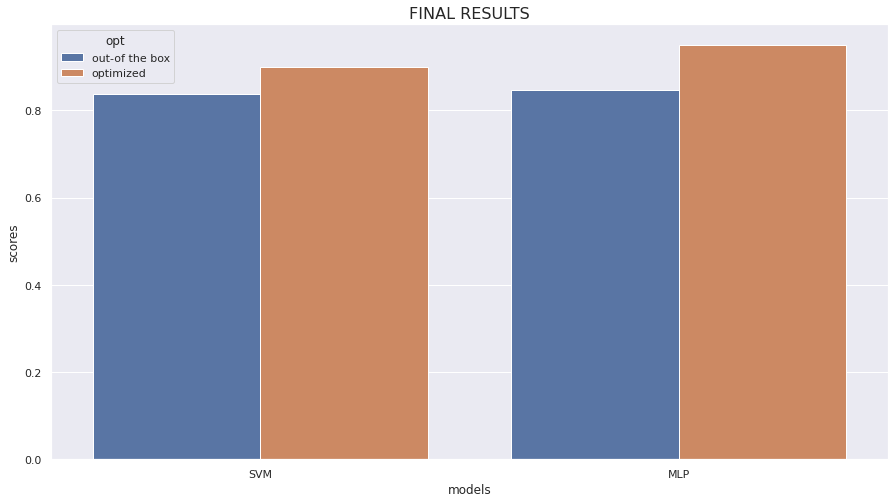

In [33]:
df = pd.DataFrame({
'models': ['SVM', 'SVM', 'MLP', 'MLP'],
'scores': [ 0.8372, 0.8998, 0.8468, 0.9494],
'opt': ['out-of the box','optimized','out-of the box','optimized']})

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(15, 8))

# grouped barplot
sns.barplot(x="models", y="scores", hue="opt", data=df, ci=None);

plt.title('FINAL RESULTS', fontsize=16)